# Capstone Proposal

## The project's domain background 
    
    — the field of research where the project is derived

Robotics is the application of AI that most excites me. Autonomous vehicles is one of the most direct applications of AI in robotics, and this intersection between development of real products and cutting edge research is one of the reasons I am passionate about my job in this field.

Day to day I spend most of my time on perception, mostly at the microwave wavelength at which radar sees the world. While this world hits both of my twin passions of physics and robotics, it is unfortunately hard to share, as sensor data is largely proprietary, and cannot be shared with publically. 

Instead, I would like to tackle the other end of the autonomy problem, that of planning and control. To acheive this end, I plan to build upon the skills developed in the reinforcement learning section on the nanodegree for continous robotic control, specifically a DDPG agent (suited to continous control), while utilizing OpenAI's gym framework to solve a variety of control problems. 

Finally, to keep the focus on something related to autonomous vehicles, once we have proven that an agent can learn simplier control tasks in "classic control", it will be unleashed on the the car racing simulation in the Box2D section of OpenAI's gym. 

* https://gym.openai.com/envs/CarRacing-v0/

    
## A problem statement
    
    — a problem being investigated for which a solution will be defined

How well can agents generalize between different tasks? 

Specifically, how well does the DDPG agent generalize to a variety of other control tasks? What changes to reward function and agent are necessary, if any, to use the same agent to solve these tasks? Depending on the enviroment, what modifications to the agent are beneficial to solving a selection OpenAI's control environments. 

Can we train an agent on other control tasks, then transfer some of this learning to a car racing environments? If possible, this will show the usefulness of the "transfer learning" approach often used in reinforcement leaning. At least, if not the weights and the input and output layers which are linked to the state and actions of the environment, can the general network architecture be shared?

If so, it allows us to train an agent in a simple, perhaps fast simulation, for many episodes, before training on a more complicated task.

At a minimum, the agent will be tested on the mountain car and cartpole simulations, before moving on to the car racing simulation.

Below are some references with OpenAI problems solved by actor-critic networks similar to the DDPG that will be attempted.

* [1] Actor-Critic Models with Keras and OpenAI: https://towardsdatascience.com/reinforcement-learning-w-keras-openai-actor-critic-models-f084612cfd69
* [2] CONTINUOUS CONTROL WITH DEEP REINFORCEMENT LEARNING TimothyP.Lillicrap, JonathanJ.Hunt, AlexanderPritzel, NicolasHeess, TomErez, YuvalTassa, DavidSilver&DaanWierstra
* [3] SoftActor-Critic: Off-Policy Maximum Entropy Deep Reinforcement Learning with a Stochastic Actor. TuomasHaarnoja, Aurick Zhou, Pieter Abbeel, Sergey Levine

   
## The datasets and inputs

    — data or inputs being used for the problem
    
Since this is reinforcement learning, the data is the interaction with the enviroment itself. In this case the data and inputs will come from OpenAI's Gym enviroments.

* https://gym.openai.com/envs/CartPole-v1/
* https://gym.openai.com/envs/MountainCarContinuous-v0/
* https://gym.openai.com/envs/CarRacing-v0/

For the final task of car racing, the state space is as follows:  

* State consists of 96x96 pixels
* Reward is -0.1 every frame and +1000/N for every track tile visited, where N is the total number of tiles in track. For example, if you have finished in 732 frames, your reward is 1000 - 0.1*732 = 926.8 points.  
* Car also can go outside of PLAYFIELD, that is far off the track, then it will get -100 and die. 

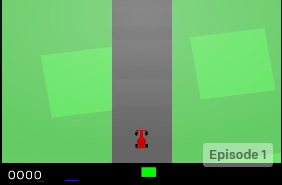

    
## A solution statement

    — a the solution proposed for the problem given

A solution will be defined based on the OpenAI car racing simulation.

* The episode finishes when all tiles representing a section of track are visited
* CarRacing-v0 defines "solving" as getting average reward of 900 over 100 consecutive trials.

The best agent will be able to traverse the track as quickly as possible, i.e. in the least number of frames, which will translate into the highest reward based on the default reward function provided by OpenAI.

   
## A benchmark model

    — some simple or historical model or result to compare the defined solution to;
    
Reinforcement learning is one of the least understood parts of artificial intellience. Due to the open nature of the problems tackled, with ill-defined "success" and "failure", when compared to the ground truth labels of supervised learning, it is often hard to benchmark reinforcement learning. 

### Benchmark I (initial goal)

A simple Q-learning agent, one not as well suited to the task on continuous control as DDPG, will serve as an initial benchmark agent.

### Benchmark II (stretch goal)

OpenAI has created a "gym", a framework with a set of "standard" environments and problem scopes, in which different agents can be rated against. 

I will use this to score the performance on my agent.

https://github.com/openai/gym/wiki/Leaderboard    

From here, the current leading is a submission from AMD using a Double Deep Q Network with Dropout "A Double Deep Q-Network (DDQN) [2] was trained using a modified version of the DeepMind Atari2600 architecture[1], a form of curriculum learning[3], and dropout for regularization[4]".

* https://github.com/AMD-RIPS/RL-2018
* https://drive.google.com/file/d/1DQU4yCsq6nbVJB6WKoXlED9YFGDselIu/view


    
## A set of evaluation metrics 

    — functional representations for how the solution can be measured;
    
The agents and reward functions will be evaluated based on three criteria
1. How well the agent does the task: the percentage of the goal acheived.
2. How quickly the agent learns the task: the number of many episodes to get to the goal.
3. How well does the agent learn: the average reward per episode, and a rolling average (say 100 episodes) reward per episode to better evaluate if the gradient of the learning is overall increasing.

    
## An outline of the project design 
 
    — how the solution will be developed and results obtained.

The project will be broken down into sections, each covering a different OpenAI environment.

For each environment, the DDPG agent will be used to solve the enviroment, with the results evaluated against the evaluation metrics, and compared with the results of the leaderboard on OpenAI.

The mountain car, and cartpole will serve as a starting point for test enviroments.

For the DDPG agent, the following initial architecture will be used.
* actor: 4 dense layers (64, 128, 128, 64) with dropout (this seems to help overfitting), relu for dense layers with sigmoid for activation layer to handle the continous action space
* actor: 4 dense layers (64, 128, 128, 32) with dropout (this seems to help overfitting), all relu
* Since the input space is pixels, CNN layers usage will also be evaluated (like the Atari game agents).
* optimizers (actor and critic): adam with learning rate of 0.0001, amsgrad = true (amsgrad: https://keras.io/optimizers/, https://openreview.net/forum?id=ryQu7f-RZ)
* OU Noise on the action space
* Memory Replay buffer to better learn from past episodes through random sampling
* simulated annealing of action space noise to help with the agent getting stuck
* L2 regularization on layers (was recommended in project review, but did not get a chance to try this on the quadcopter project and would like to experiment, https://keras.io/regularizers/)

---

# Capstone Project Report

Note: "sample_" has been placed in front of classes and functions in this notebook to avoid confusing with the .py files containing the actual methods called for training agents in OpenAI.


## 1. Building an Open-AI Reinforcement Learning Framework

One of the goals of this project was to evaluate agent performance across different OpenAI enviroments. This was to see how well agents could generalize, as opposed to requiring re-tuning and re-architecting for every environment. In order to do this, the first challenge was decide on a software architecture for training reinforcement learning agents with OpenAI Gym. 

There are many different versions of training code available for different environments and agents. Udacity provides several, and there are countless on online blogs and github repositories. Without a common design framework it is hard to combine these different resources into something that can be used for this project. Most of the source code found online seemed overly complex, brittle, hard to debug, and hard to modify.

With in mind, the following modules were developed to abstract away the reinforcement learning training process, and make it as general as possible for different agents and enviroments:

* Main: primary script. Manages agent and environment selection, examine enviroment, trigger interaction between the environment and the agent for training and testing, and plot results.
* Enviroment: In this case, OpenAI gym. The state and action sizes will be derived from here.
* Agent: The agent to train and test. The agent will need to have the ability to perform in both test and train mode. The agent will require the following functionality: act, learn, step, and reset (these are often blended together in other implementations, making switching agents and environments difficult, and modifying agents without breaking them troublesome).
* Interact: over a series of episodes, engage the agent with the enviroment in discrete time steps, in either training or test mode, compute the training time, plot actions and rewards selectively, and write the results to file.

### 1.1 Main Flowchat

1. Select enviroment (and optionally examine it)
2. Select agent (must be environment compatiable)
3. Interact environment and agent in training mode
4. Plot training results
5. Interact environment and agent in test mode
6. Plot test results
7. Close environment


In [1]:
import gym

"""
# Create an environment and set random seed
"""
selectedEnvironment = 6
env = 0
envName = 0

# Toy Text - Discrete state and action space
if selectedEnvironment == 0:
    envName = 'Taxi-v2'

# Classic Control - Continuous State and Discrete Action Spaces
elif selectedEnvironment == 1: 
    envName = 'MountainCar-v0' # needs Discretized or better
elif selectedEnvironment == 2: 
    envName = 'Acrobot-v1'     # needs Discretized, Tile Encoding or better
elif selectedEnvironment == 3: 
    envName = 'CartPole-v1'    # needs Deep Q Learning to do well?

# Box 2D - Continuous State, Discrete Actions
elif selectedEnvironment == 4: 
    envName = 'LunarLander-v2' # discrete actions, continuous state

# Classic Control - Continuous State and Action Spaces
elif selectedEnvironment == 5: 
    envName = 'Pendulum-v0' # continuous only
elif selectedEnvironment == 6: 
    envName = 'MountainCarContinuous-v0' # continuous only

# Box 2D - Continuous State and Action Spaces
elif selectedEnvironment == 7:
    envName = 'LunarLanderContinuous-v2' # continuous only
elif selectedEnvironment == 8: 
    envName = 'BipedalWalker-v2'  # continuous only

# Box 2D - Image State and Continuous Action Spaces   
elif selectedEnvironment == 9: 
    envName = 'CarRacing-v0'      #  image input, actions [steer, gas, brake]

# Initialize the environment
env = gym.make(envName)
env.reset()

array([-0.49785404,  0.        ])

In [2]:
# Basic inspection of the environment
def sample_examine_environment(env):

    # Run a random agent
    score = 0
    for t in range(250):
        action = env.action_space.sample()
        env.render()
        state, reward, done, _ = env.step(action)
        score += reward
        if done:
            break 
    print('Final score:', score)
    env.close()
    
    # Explore state (observation) space
    print("State space:", env.observation_space)
    print("- low:", env.observation_space.low)
    print("- high:", env.observation_space.high)
    
    # Generate some samples from the state space 
    print("State space samples:")
    print(np.array([env.observation_space.sample() for i in range(10)]))
    
    # Explore the action space
    print("Action space:", env.action_space)
    
    # Generate some samples from the action space
    print("Action space samples:")
    print(np.array([env.action_space.sample() for i in range(10)]))


### 1.2 Interact Flowchat

1. Initialize: setup writer, start time, best reward
2. Process episodes: agent acts, enviroment steps, agent learns (if in learn mode), agent steps 
3. Monitor: print and plot select results (rewards, actions per step) to monitor progress

In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt 
import csv
import time
import datetime

from visuals import plot_scores

def sample_interact(agent, env, num_episodes=20000, mode='train', file_output="results.txt"):
    """Run agent in given reinforcement learning environment and return scores."""
    
    # Save simulation results to a CSV file.
    labels = ['episode', 'timestep', 'reward']

    # Run the simulation, and save the results.
    with open(file_output, 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(labels)
        
        scores = []
        best_reward = -np.inf # keep track of the best reward across episodes
        all_start_time = time.time()
    
        for i_episode in range(1, num_episodes+1):
            # Initialize episode
            state = env.reset()        # reset environment        
            agent.reset_episode(state) # reset agent      
            episode_steps = 0 # Reset for the new episode
            episode_total_reward = 0   # total rewards per episode
            done = False
            actionList = []
            start_time = time.time()

            # Interact with the Environment in steps until done
            while not done:
                # 1. agent action given environment state
                #    assumes explore/exploit as part of agent design
                # 2. enviroment changes based on action
                # 3. (training mode) learn from environment feedback 
                #    (new state, reward, done) to agent
                # 4. step the agent (forward with the new state)
                              
                action = agent.act(state, mode)
                state, reward, done, info = env.step(action)
                
                if mode == 'train':
                    agent.learn(action, reward, state, done)
                
                agent.step(state)
    
                # render event 25 steps
                if(episode_steps % 25 == 0) and mode != 'train':
                    env.render()
                    print("\tstep: ", episode_steps, ", action:", action)
    
                # gather episode results until the end of the episode
                episode_total_reward += reward
                episode_steps += 1                
                actionList.append(action)
                
                # Save results of timestep of each episode to csv file
                to_write = [i_episode] + [episode_steps] + [reward]
                writer.writerow(to_write)

            """
            Episode Done - Plot Results and Update best episode/reward
            """
    
            # Save final score of the episode
            scores.append(episode_total_reward)
            
            # plot scores each 50 episodes
            if(i_episode % 25 == 0):
                plt.figure(1)
                _ = plot_scores(scores)

            # plot episode actions for analysis
            if(i_episode % 10 == 0 and mode == 'train'):
                plt.figure(2)
                if(episode_steps > 400): #[0:500]
                    plt.plot(actionList[0:400])
                    plt.title("actions over steps")
                    plt.show()
                    plt.figure(3)
                    plt.plot(actionList[400:len(actionList)])
                    plt.title("actions over steps")
                    plt.show()
                else:             
                    plt.plot(actionList)
                    plt.title("actions over steps")
                    plt.show()
            elif mode != 'train': 
                plt.plot(actionList)
                plt.title("actions over steps")
                plt.show()                
            
            # Print episode stats
            if mode == 'train':
                  
                if episode_total_reward > best_reward:
                    best_reward = episode_total_reward 
                    best_episode = i_episode
                
                print("\rEpisode = {:4d} (duration of {} steps); Reward = {:7.3f} (best = {:7.3f}, in epi {})   ".format(
                    i_episode, episode_steps, episode_total_reward, best_reward, best_episode), end="")  # [debug]               

                # show the compute time to train the episode
                elapsed_time = time.time() - start_time
                print("\n\tEpisode training time: ", elapsed_time)    
                
                sys.stdout.flush()

        # show the compute time to train for all episodes
        all_elapsed_time = time.time() - all_start_time
        print("\n******************************")    
        print("\n*** All episodes training time (HH:MM:SS): ", str(datetime.timedelta(seconds=all_elapsed_time)))    
        print("\tAverage training time per episode: ", all_elapsed_time/num_episodes)    
        print("******************************")   

In [4]:
def sample_plot_score_from_file(file_to_read):
    # Load simulation results from the .csv file
    results = pd.read_csv(file_to_read)
    
    # Total rewards for each episode
    episode_rewards_sum = results.groupby(['episode'])[['reward']].sum()
    smoothed_sum = episode_rewards_sum.rolling(25).mean() 
       
    # plot the sum rewards
    plt.figure(4)
    plt.plot(episode_rewards_sum, label='sum rewards')
    plt.plot(smoothed_sum, label='running mean')
    plt.legend()
    axes = plt.gca()
    axes.set_ylim([-250,250])
    plt.show()  

### 1.3 Handling Different Enviroment Types

The following environment types are available in OpenAI:

1. discrete states and actions. 
2. discrete actions, continuous states. 
3. continuous states continuous actions. 
4. Image pixel states, continuous actions. 

Therefore, in order to examine different agent performance across different environments, we need to ensure compatiability across these types, or at least make agents interchangable so that certain agents could be used for certain types of enviroment state and action spaces. 

For example, being a discrete state space, the Taxi-v2 environment does not have the observation space low field, making it not fully compatiable with the examine_environment written from continuous state spaces and discrete/continuous action spaces.

#### Explore or Exploit

This decision was made part of the agent act class method to generalize across agents and enviroments, so each agent is responsible for their exploration policy as part of the agent design.

In [5]:
# 1. discrete states and actions

import gym

# Initialize the enviroment
env = gym.make('Taxi-v2') # continuous only
env.reset()

# Examine the environment
from visuals import examine_environment
examine_environment(env)


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y|

In [6]:
# 2. discrete actions, continuous states.  

# Initialize the enviroment
env = gym.make('MountainCar-v0')
env.seed(505);
env.reset()

# Examine the environment
from visuals import examine_environment
examine_environment(env)

Final score: -100.0
State space: Box(2,)
State space samples:
[[-0.689  0.029]
 [-1.138 -0.061]
 [-0.135  0.04 ]
 [-0.477  0.01 ]
 [-0.635 -0.044]
 [-0.611  0.047]
 [-0.757 -0.016]
 [ 0.528  0.053]
 [-1.023 -0.005]
 [-0.451  0.063]]
Action space: Discrete(3)
Action space samples:
[1 0 2 0 0 0 0 2 2 2]


In [7]:
# 3. continuous states continuous actions. 

# Initialize the enviroment
env = gym.make('MountainCarContinuous-v0') # continuous only
env.seed(505);
env.reset()

# Examine the environment
from visuals import examine_environment
examine_environment(env)

Final score: -3.76486647975512
State space: Box(2,)
State space samples:
[[-0.434 -0.066]
 [-0.911  0.055]
 [-0.03  -0.007]
 [-1.189  0.03 ]
 [-1.197 -0.068]
 [-1.028  0.044]
 [-0.59   0.05 ]
 [-0.11   0.038]
 [-0.777 -0.044]
 [ 0.165 -0.004]]
Action space: Box(1,)
Action space samples:
[[-0.851]
 [ 0.128]
 [-0.792]
 [ 0.218]
 [ 0.444]
 [-0.305]
 [ 0.001]
 [ 0.177]
 [-0.102]
 [-0.821]]


In [8]:
# 4. Image pixel states, continuous actions. 

# Initialize the enviroment
env = gym.make('CarRacing-v0') # continuous only
env.reset()

# Examine the environment
from visuals import examine_environment
examine_environment(env)

Track generation: 1077..1361 -> 284-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1013..1270 -> 257-tiles track
Final score: 5.6250000000000355
State space: Box(96, 96, 3)
State space samples:
[[[[ 34  39  36]
   [ 88 177 110]
   [ 73  22 135]
   ...
   [100 214 161]
   [247 115  76]
   [253 105 162]]

  [[118 219  52]
   [224 234  42]
   [ 88 245  70]
   ...
   [102 142 189]
   [159 126 123]
   [  8 238   0]]

  [[231  39 200]
   [111 173 224]
   [183  83  50]
   ...
   [219  77 155]
   [ 47  21 111]
   [  2  12  62]]

  ...

  [[ 50  90  60]
   [126 177 224]
   [  2 239 164]
   ...
   [253 204 115]
   [213 204  22]
   [220  30 132]]

  [[ 52 228  58]
   [ 38 226 181]
   [ 47 150 124]
   ...
   [ 64 136 172]
   [234 138 130]
   [155 176   7]]

  [[ 76 115  84]
   [107  97 144]
   [125 210 206]
   ...
   [ 72 194   2]
   [132   8 239]
   [227  36 152]]]


 [[[210 145 197]
   [107 124 143]
   [124 241 160]
   ...
   [235  83 252]
 

## 2. Agents Summary

### 2.1 Simple Q Learning Agent (Benchmark Agent)

The baseline agent for this project is modelled after the Q-Learning agent with state discretization provided by Udacity in a practice project. Small modifications have been made where necessary in order to align with the training architecture for this project.

A Q learning agent learns by comparing the expected reward with the actual reward. This approach mirrors that found in cognitive neuroscience on how learning works in biological systems [15].

This agent is designed to handle continuous state (with the agent discretizes), and discrete action spaces in OpenAI Gym, such as the discrete versions of Lunar Lander, Mountain Car, Acrobat, and Cartpole.

In [9]:
import numpy as np
from agents import discretize as dis

class sample_QLearningAgent:
    """Q-Learning agent that can act on a continuous state space by discretizing it."""

    def __init__(self, env, alpha=0.02, gamma=0.99,
                 epsilon=1.0, epsilon_decay_rate=0.9995, min_epsilon=.01, seed=505):
        """Initialize variables, create grid for discretization."""
        # Environment info
        self.env = env
        state_grid = dis.create_uniform_grid(env.observation_space.low, env.observation_space.high, bins=(20, 20))
        self.state_grid = state_grid
        self.state_size = tuple(len(splits) + 1 for splits in self.state_grid)  # n-dimensional state space
        self.action_size = self.env.action_space.n  # 1-dimensional discrete action space
        self.seed = np.random.seed(seed)
        print("Environment:", self.env)
        print("State space size:", self.state_size)
        print("Action space size:", self.action_size)
        
        # Learning parameters
        self.alpha = alpha  # learning rate
        self.gamma = gamma  # discount factor
        self.epsilon = self.initial_epsilon = epsilon  # initial exploration rate
        self.epsilon_decay_rate = epsilon_decay_rate # how quickly should we decrease epsilon
        self.min_epsilon = min_epsilon
        
        # Create Q-table
        self.q_table = np.zeros(shape=(self.state_size + (self.action_size,)))
        print("Q table size:", self.q_table.shape)

    def preprocess_state(self, state):
        """Map a continuous state to its discretized representation."""
        # TODO: Implement this
        return tuple(dis.discretize(state, self.state_grid))

    def reset_episode(self, state):
        """Reset variables for a new episode."""
        # Gradually decrease exploration rate
        self.epsilon *= self.epsilon_decay_rate
        self.epsilon = max(self.epsilon, self.min_epsilon)

        # Decide initial action
        self.last_state = self.preprocess_state(state)
        self.last_action = np.argmax(self.q_table[self.last_state])
        return self.last_action
    
    def reset_exploration(self, epsilon=None):
        """Reset exploration rate used when training."""
        self.epsilon = epsilon if epsilon is not None else self.initial_epsilon

    def act(self, state, mode):
        """Pick next action and update internal Q table (when mode != 'test')."""
        state = self.preprocess_state(state)

        # Exploration vs. exploitation
        do_exploration = np.random.uniform(0, 1) < self.epsilon
        if do_exploration and mode == "train":
            # Pick a random action
            action = np.random.randint(0, self.action_size)
        else:
            # Pick the best action from Q table
            action = np.argmax(self.q_table[state])

        # Roll over current action for next step
        self.last_action = action
        return action
    
    def learn(self, action, reward, state, done):
        """Pick next action and update internal Q table (when mode != 'test')."""
        state = self.preprocess_state(state)
        # Train mode (default): Update Q table, pick next action
        # Note: We update the Q table entry for the *last* (state, action) pair with current state, reward
        self.q_table[self.last_state + (self.last_action,)] += self.alpha * \
            (reward + self.gamma * max(self.q_table[state]) - self.q_table[self.last_state + (self.last_action,)])

    def step(self, state):
        """Pick next action and update internal Q table (when mode != 'test')."""
        state = self.preprocess_state(state)
        # Roll over current state, action for next step
        self.last_state = state

In [10]:
import numpy as np
from agents import tile as tile

class sample_QTable:
    """Simple Q-table."""

    def __init__(self, state_size, action_size):
        """Initialize Q-table.
        
        Parameters
        ----------
        state_size : tuple
            Number of discrete values along each dimension of state space.
        action_size : int
            Number of discrete actions in action space.
        """
        self.state_size = state_size
        self.action_size = action_size

        # TODO: Create Q-table, initialize all Q-values to zero
        # Note: If state_size = (9, 9), action_size = 2, q_table.shape should be (9, 9, 2)
        self.q_table = np.zeros(shape=(self.state_size + (self.action_size,)))
        print("QTable(): size =", self.q_table.shape)


class sample_TiledQTable:
    """Composite Q-table with an internal tile coding scheme."""
    
    def __init__(self, low, high, tiling_specs, action_size):
        """Create tilings and initialize internal Q-table(s).
        
        Parameters
        ----------
        low : array_like
            Lower bounds for each dimension of state space.
        high : array_like
            Upper bounds for each dimension of state space.
        tiling_specs : list of tuples
            A sequence of (bins, offsets) to be passed to create_tilings() along with low, high.
        action_size : int
            Number of discrete actions in action space.
        """
        self.tilings = tile.create_tilings(low, high, tiling_specs)
        self.state_sizes = [tuple(len(splits)+1 for splits in tiling_grid) for tiling_grid in self.tilings]
        self.action_size = action_size
        self.q_tables = [QTable(state_size, self.action_size) for state_size in self.state_sizes]
        print("TiledQTable(): no. of internal tables = ", len(self.q_tables))
    
    def get(self, state, action):
        """Get Q-value for given <state, action> pair.
        
        Parameters
        ----------
        state : array_like
            Vector representing the state in the original continuous space.
        action : int
            Index of desired action.
        
        Returns
        -------
        value : float
            Q-value of given <state, action> pair, averaged from all internal Q-tables.
        """
        # TODO: Encode state to get tile indices
        encoded_state = tile.tile_encode(state, self.tilings)
        
        # TODO: Retrieve q-value for each tiling, and return their average
        value = 0.0
        for idx, q_table in zip(encoded_state, self.q_tables):
            value += q_table.q_table[tuple(idx + (action,))]
        value /= len(self.q_tables)
        return value
    
    def update(self, state, action, value, alpha=0.1):
        """Soft-update Q-value for given <state, action> pair to value.
        
        Instead of overwriting Q(state, action) with value, perform soft-update:
            Q(state, action) = alpha * value + (1.0 - alpha) * Q(state, action)
        
        Parameters
        ----------
        state : array_like
            Vector representing the state in the original continuous space.
        action : int
            Index of desired action.
        value : float
            Desired Q-value for <state, action> pair.
        alpha : float
            Update factor to perform soft-update, in [0.0, 1.0] range.
        """
        # TODO: Encode state to get tile indices
        encoded_state = tile.tile_encode(state, self.tilings)
        
        # TODO: Update q-value for each tiling by update factor alpha
        for idx, q_table in zip(encoded_state, self.q_tables):
            value_ = q_table.q_table[tuple(idx + (action,))]  # current value
            q_table.q_table[tuple(idx + (action,))] = alpha * value + (1.0 - alpha) * value_


class sample_QLearningAgentDisTiles:
    """Q-Learning agent that can act on a continuous state space by discretizing it."""

    def __init__(self, env, alpha=0.02, gamma=0.99,
                 epsilon=1.0, epsilon_decay_rate=0.9995, min_epsilon=.01, seed=0):
        
        """Initialize variables, create grid for discretization."""
        n_bins = 20
        bins = tuple([n_bins]*env.observation_space.shape[0])
        offset_pos = (env.observation_space.high - env.observation_space.low)/(3*n_bins)

        tiling_specs = [(bins, -offset_pos),
                (bins, tuple([0.0]*env.observation_space.shape[0])),
                (bins, offset_pos)]

        tq = TiledQTable(env.observation_space.low, 
                 env.observation_space.high, 
                 tiling_specs, 
                 env.action_space.n)
        
        # Environment info
        self.env = env
        self.tq = tq 
        self.state_sizes = tq.state_sizes           # list of state sizes for each tiling
        self.action_size = self.env.action_space.n  # 1-dimensional discrete action space
        self.seed = np.random.seed(seed)
        print("Environment:", self.env)
        print("State space sizes:", self.state_sizes)
        print("Action space size:", self.action_size)
        
        # Learning parameters
        self.alpha = alpha  # learning rate
        self.gamma = gamma  # discount factor
        self.epsilon = self.initial_epsilon = epsilon  # initial exploration rate
        self.epsilon_decay_rate = epsilon_decay_rate   # how quickly should we decrease epsilon
        self.min_epsilon = min_epsilon

    def reset_episode(self, state):
        """Reset variables for a new episode."""
        # Gradually decrease exploration rate
        self.epsilon *= self.epsilon_decay_rate
        self.epsilon = max(self.epsilon, self.min_epsilon)
        
        self.last_state = state
        Q_s = [self.tq.get(state, action) for action in range(self.action_size)]
        self.last_action = np.argmax(Q_s)
    
    def reset_exploration(self, epsilon=None):
        """Reset exploration rate used when training."""
        self.epsilon = epsilon if epsilon is not None else self.initial_epsilon

    def act(self, state, mode):
        """Pick next action """
        Q_s = [self.tq.get(state, action) for action in range(self.action_size)]
        # Pick the best action from Q table
        greedy_action = np.argmax(Q_s)

        # Exploration vs. exploitation
        do_exploration = np.random.uniform(0, 1) < self.epsilon
        if do_exploration and mode == "train":
            # Pick a random action
            action = np.random.randint(0, self.action_size)
        else:
            # Pick the greedy action
            action = greedy_action

        # Roll over current state, action for next step
        self.last_action = action
        return action

    def learn(self, action, reward, state, done):
        """Pick next action and update internal Q table (when mode != 'test')."""
        Q_s = [self.tq.get(state, action) for action in range(self.action_size)]

        # Train mode (default): Update Q table, pick next action
        # Note: We update the Q table entry for the *last* (state, action) pair with current state, reward
        value = reward + self.gamma * max(Q_s)
        self.tq.update(self.last_state, self.last_action, value, self.alpha)

    def step(self, state):
        # Roll over current state, action for next step
        self.last_state = state


### 2.2 Deep Q Network (Benchmark Agent)

This agent is similar to the simple Q learning agent, except that instead of a Q learning table a deep neural network is used. The agent is based on sample code from the Reinforcement Learning section of Udacity's Machine Learning 

In [11]:
import numpy as np
from collections import deque

class sample_Memory():
    def __init__(self, max_size=1000):
        self.buffer = deque(maxlen=max_size)
    
    def add(self, experience):
        self.buffer.append(experience)
            
    def sample(self, batch_size):
        idx = np.random.choice(np.arange(len(self.buffer)), 
                               size=batch_size, 
                               replace=False)
        return [self.buffer[ii] for ii in idx]
    
    
import tensorflow as tf

class sample_QNetwork:
    def __init__(self, learning_rate=0.0001, state_size=4, 
                 action_size=2, hidden_size=64, 
                 name='QNetwork'):
        
        # Memory parameters
        self.memory_size = 10000               # memory capacity
        self.batch_size = 20                   # experience mini-batch size
        self.pretrain_length = self.batch_size # number experiences to pretrain the memory
        self.memory = Memory(max_size=self.memory_size)
        
        # state inputs to the Q-network
        with tf.variable_scope(name):
            # Network parameters
            self.hidden_size = hidden_size      # number of units in each Q-network hidden layer
            self.learning_rate = learning_rate  # Q-network learning rate
            
            self.inputs_ = tf.placeholder(tf.float32, [None, state_size], name='inputs')
            
            # One hot encode the actions to later choose the Q-value for the action
            self.actions_ = tf.placeholder(tf.int32, [None], name='actions')
            one_hot_actions = tf.one_hot(self.actions_, action_size)
            
            # Target Q values for training
            self.targetQs_ = tf.placeholder(tf.float32, [None], name='target')
            
            # ReLU hidden layers
            self.fc1 = tf.contrib.layers.fully_connected(self.inputs_, hidden_size)
            self.fc2 = tf.contrib.layers.fully_connected(self.fc1, hidden_size)

            # Linear output layer
            self.output = tf.contrib.layers.fully_connected(self.fc2, action_size, 
                                                            activation_fn=None)
            
            ### Train with loss (targetQ - Q)^2
            # output has length 2, for two actions. This next line chooses
            # one value from output (per row) according to the one-hot encoded actions.
            self.Q = tf.reduce_sum(tf.multiply(self.output, one_hot_actions), axis=1)
            
            self.loss = tf.reduce_mean(tf.square(self.targetQs_ - self.Q))
            self.opt = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)

### 2.3 DDPG (Primary Agent)

Reinforcement Learning agent using Deep Deterministic Policy Gradients. 

This is an actor(policy)-critic(value) method, where the policy function used is deterministic, with noise added to produce the desired stochasticity in actions taken. The agent uses random memory buffer to de-correlate current actions and states from learned experiences.

DDPG agents are well suited to continuous action and state spaces, and will be the focus of this project.

Original Paper:
Lillicrap, Timothy P., et al., 2015. Continuous Control with Deep 
Reinforcement Learning, https://arxiv.org/pdf/1509.02971.pdf

In [12]:
# replay buffer

import numpy as np

import random
from collections import namedtuple, deque

class sample_ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, buffer_size, batch_size):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size: maximum size of buffer
            batch_size: size of each training batch
        """
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])

    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self, batch_size=64):
        """Randomly sample a batch of experiences from memory."""
        return random.sample(self.memory, k=self.batch_size)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)


In [13]:
# Actor

import keras    
from keras import layers, models, optimizers
#from keras import backend as K
from keras import regularizers

class sample_Actor:
    """
    Actor (Policy) Model for DDPG
    """

    def __init__(self, state_size, action_size, action_low, action_high, netArch, learning_rate, dropout_rate):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            action_low (array): Min value of each action dimension
            action_high (array): Max value of each action dimension
        """
        self.state_size = state_size
        self.action_size = action_size
        self.action_low = action_low
        self.action_high = action_high
        self.action_range = self.action_high - self.action_low
        self.netArch = netArch # network architecture selection
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.build_model()

        print("*** init actor ***")
        print("self.action_range: ", self.action_range)

    def build_model(self):
        """Build an actor (policy) network that maps states -> actions."""
        states = 0
        actions = 0
        
        if self.netArch =="Lillicrap":
            # Define input layer (states)
            states = keras.layers.Input(shape=(self.state_size,), name='states')
    
            # Kernel initializer with fan-in mode and scale of 1.0
            kernel_initializer = keras.initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None)
    
            # Add hidden layers
            net = keras.layers.Dense(units=400, activation='elu', kernel_initializer=kernel_initializer)(states)
            net = keras.layers.Dense(units=300, activation='elu', kernel_initializer=kernel_initializer)(net)
    
            # Add final output layer with sigmoid activation
            raw_actions = keras.layers.Dense(units=self.action_size, activation='sigmoid', name='raw_actions', kernel_initializer=kernel_initializer)(net)

        elif self.netArch =="UniformLayers":
            # Define input layer (states)
            states = keras.layers.Input(shape=(self.state_size,), name='states')

            layerSize = 300
            print("UniformLaters: layerSize", layerSize)
            # Define input layer (states)
#            kernel_initializer = keras.initializers.glorot_normal(seed=None)
       
            # Add hidden layers
            net = keras.layers.Dense(units=layerSize, activation='relu')(states)
            net = keras.layers.Dense(units=layerSize, activation='relu')(net)
            net = keras.layers.Dense(units=layerSize, activation='relu')(net)
            net = keras.layers.Dense(units=layerSize, activation='relu')(net)
            net = keras.layers.Dense(units=layerSize, activation='relu')(net)
            net = keras.layers.Dense(units=layerSize, activation='relu')(net)
    
            # Add final output layer with sigmoid activation
            raw_actions = keras.layers.Dense(units=self.action_size, activation='sigmoid', name='raw_actions')(net)
        
        elif self.netArch == "Hausknecht":

            # Define input layer (states)
            states = keras.layers.Input(shape=(self.state_size,), name='states')
      
            # Add hidden layers
#            net = keras.layers.Dense(units=32, activation='relu')(net)
#            net = keras.layers.Dense(units=64, activation='relu')(net)
            net = keras.layers.Dense(units=1024, activation='relu')(states)
            net = keras.layers.Dense(units=512, activation='relu')(net)
            net = keras.layers.Dense(units=256, activation='relu')(net)
            net = keras.layers.Dense(units=128, activation='relu')(net)
    
            # Add final output layer with sigmoid activation
            raw_actions = keras.layers.Dense(units=self.action_size, activation='sigmoid', name='raw_actions')(net)

        
        elif self.netArch == "QuadCopter":
            # Define input layer (states)
            states = keras.layers.Input(shape=(self.state_size,), name='states')
   
            net = layers.Dense(units=64, activation='relu', \
                   kernel_regularizer=regularizers.l2(0.001))(states)
            net = layers.Dropout(self.dropout_rate)(net)

            net = layers.Dense(units=128, activation='relu', \
                   kernel_regularizer=regularizers.l2(0.001))(net)
            net = layers.Dropout(self.dropout_rate)(net)

            net = layers.Dense(units=128, activation='relu', \
                   kernel_regularizer=regularizers.l2(0.001))(net)
            net = layers.Dropout(self.dropout_rate)(net)

            net = layers.Dense(units=64, activation='relu', \
                   kernel_regularizer=regularizers.l2(0.001))(net)
            net = layers.Dropout(self.dropout_rate)(net)

            # Add final output layer with sigmoid activation
            raw_actions = keras.layers.Dense(units=self.action_size, activation='sigmoid', name='raw_actions')(net)

        elif self.netArch == "QuadCopterBig":
            
            bigUp = 2 # option kernel_regularizer=regularizers.l2(0.01)
            
            # Define input layer (states)
            states = keras.layers.Input(shape=(self.state_size,), name='states')

#            noiseStd = 0.1
#            print("actor noiseStd: ", noiseStd)
#            net = keras.layers.GaussianNoise(noiseStd)(states)
   
            net = layers.Dense(units=64 * bigUp, activation='relu')(states)
            net = layers.Dropout(self.dropout_rate)(net)

            net = layers.Dense(units=128 * bigUp, activation='relu')(net)
            net = layers.Dropout(self.dropout_rate)(net)

            net = layers.Dense(units=128 * bigUp, activation='relu')(net)
            net = layers.Dropout(self.dropout_rate)(net)

            net = layers.Dense(units=64 * bigUp, activation='relu')(net)
            net = layers.Dropout(self.dropout_rate)(net)

            # Add final output layer with sigmoid activation
            raw_actions = keras.layers.Dense(units=self.action_size, activation='sigmoid', name='raw_actions')(net)

        elif self.netArch == "QuadCopterBigNoDropout":
            
            bigUp = 2            
            # Define input layer (states)
            states = keras.layers.Input(shape=(self.state_size,), name='states')   
            net = layers.Dense(units=64 * bigUp, activation='relu')(states)
            net = layers.Dense(units=128 * bigUp, activation='relu')(net)
            net = layers.Dense(units=128 * bigUp, activation='relu')(net)
            net = layers.Dense(units=64 * bigUp, activation='relu')(net)

            # Add final output layer with sigmoid activation
            raw_actions = keras.layers.Dense(units=self.action_size, activation='sigmoid', name='raw_actions')(net)
           
        elif self.netArch == "QuadCopterMax":
            
            bigUp = 3            
            # Define input layer (states)
            states = keras.layers.Input(shape=(self.state_size,), name='states')
   
            net = layers.Dense(units=64 * bigUp, activation='relu', \
                   kernel_regularizer=regularizers.l2(0.001))(states)
            net = layers.Dropout(self.dropout_rate)(net)

            net = layers.Dense(units=128 * bigUp, activation='relu', \
                   kernel_regularizer=regularizers.l2(0.001))(net)
            net = layers.Dropout(self.dropout_rate)(net)

            net = layers.Dense(units=128 * bigUp, activation='relu', \
                   kernel_regularizer=regularizers.l2(0.001))(net)
            net = layers.Dropout(self.dropout_rate)(net)

            net = layers.Dense(units=64 * bigUp, activation='relu', \
                   kernel_regularizer=regularizers.l2(0.001))(net)
            net = layers.Dropout(self.dropout_rate)(net)

            # Add final output layer with sigmoid activation
            raw_actions = keras.layers.Dense(units=self.action_size, activation='sigmoid', name='raw_actions')(net)

        elif self.netArch == "QuadCopterBigELU":
            
            bigUp = 2            
            # Define input layer (states)
            states = keras.layers.Input(shape=(self.state_size,), name='states')
            net = layers.Dense(units=64 * bigUp, activation='elu')(states)
            net = layers.Dense(units=128 * bigUp, activation='elu')(net)
            net = layers.Dense(units=128 * bigUp, activation='elu')(net)
            net = layers.Dense(units=64 * bigUp, activation='elu')(net)

            # Add final output layer with sigmoid activation
            raw_actions = keras.layers.Dense(units=self.action_size, activation='sigmoid', name='raw_actions')(net)
            
        elif self.netArch == "QuadCopterBatchNorm":
            # This network seems to produce more intelligable actions with less episodes, 
            # but is also significatly faster than without batch normalization
            # doesn't seem to be strong evidence that it trains faster, even with a 4x 
            # learning rate
            
            bigUp = 2            
            # Define input layer (states)
            states = keras.layers.Input(shape=(self.state_size,), name='states')
   
            net = layers.Dense(units=64 * bigUp, use_bias=False, activation=None)(states)
            net = layers.BatchNormalization()(net) # (SMM) seems to help smooth results
            net = layers.Activation("relu")(net)

            net = layers.Dense(units=128 * bigUp, use_bias=False, activation=None)(net)
            net = layers.BatchNormalization()(net) # (SMM) seems to help smooth results
            net = layers.Activation("relu")(net)

            net = layers.Dense(units=128 * bigUp, use_bias=False, activation=None)(net)
            net = layers.BatchNormalization()(net) # (SMM) seems to help smooth results
            net = layers.Activation("relu")(net)

            net = layers.Dense(units=64 * bigUp, use_bias=False, activation=None)(net)
            net = layers.BatchNormalization()(net) # (SMM) seems to help smooth results
            net = layers.Activation("relu")(net)

            # Add final output layer with sigmoid activation
            raw_actions = keras.layers.Dense(units=self.action_size, activation='sigmoid', name='raw_actions')(net)
            
        elif self.netArch == "QuadCopterBatchNormInput":
            # This network seems to produce more intelligable actions with less episodes, 
            # but is also significatly faster than without batch normalization
            # doesn't seem to be strong evidence that it trains faster, even with a 4x 
            # learning rate
            
            bigUp = 2            
            # Define input layer (states)
            states = keras.layers.Input(shape=(self.state_size,), name='states')

            net = layers.BatchNormalization()(states) # (SMM) seems to help smooth results
   
            net = layers.Dense(units=64 * bigUp, activation='relu')(net)
            net = layers.Dropout(self.dropout_rate)(net)

            net = layers.Dense(units=128 * bigUp, activation='relu')(net)
            net = layers.Dropout(self.dropout_rate)(net)

            net = layers.Dense(units=128 * bigUp, activation='relu')(net)
            net = layers.Dropout(self.dropout_rate)(net)

            net = layers.Dense(units=64 * bigUp, activation='relu')(net)
            net = layers.Dropout(self.dropout_rate)(net)

            # Add final output layer with sigmoid activation
            raw_actions = keras.layers.Dense(units=self.action_size, activation='sigmoid', name='raw_actions')(net)
                
        elif self.netArch == "imageInputRGB":     

            # for img state space
            states = keras.layers.Input(shape=(96, 96, 3), name='states')
            net = keras.layers.Conv2D(32, (8, 8), strides=[4, 4], padding='same', activation='relu')(states)
            net = keras.layers.MaxPooling2D(pool_size=2)(net)
            net = keras.layers.Dropout(self.dropout_rate)(net)
            net = keras.layers.Conv2D(64, (4, 4), strides=[2, 2], padding='same', activation='relu')(net)
            net = keras.layers.MaxPooling2D(pool_size=2)(net)
            net = keras.layers.Dropout(self.dropout_rate)(net)
            net = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(net)
            net = keras.layers.MaxPooling2D(pool_size=2)(net)
            net = keras.layers.Dropout(self.dropout_rate)(net)
            
            net = keras.layers.Flatten()(net)
            net = keras.layers.Dense(units=512, activation='relu')(net)
            net = keras.layers.Dropout(self.dropout_rate)(net)
            net = keras.layers.Dense(units=256, activation='relu')(net)
            net = keras.layers.Dropout(self.dropout_rate)(net)
            raw_actions = keras.layers.Dense(units=self.action_size, activation='sigmoid', name='raw_actions')(net)

        elif self.netArch == "imageInputGrayscale":     

            # for img state space
            states = keras.layers.Input(shape=(96, 96, 1), name='states')
            
            net = keras.layers.Conv2D(32, (8, 8), strides=[4, 4], padding='same', activation='relu')(states)
            net = keras.layers.MaxPooling2D(pool_size=2)(net)
            net = keras.layers.Dropout(self.dropout_rate)(net)

            net = keras.layers.Conv2D(64, (4, 4), strides=[2, 2], padding='same', activation='relu')(net)
            net = keras.layers.MaxPooling2D(pool_size=2)(net)
            net = keras.layers.Dropout(self.dropout_rate)(net)

            net = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(net)
            net = keras.layers.MaxPooling2D(pool_size=2)(net)
            net = keras.layers.Dropout(self.dropout_rate)(net)

            net = keras.layers.Flatten()(net)
            net = keras.layers.Dense(units=512, activation='relu')(net)
            net = keras.layers.Dropout(self.dropout_rate)(net)
            raw_actions = keras.layers.Dense(units=self.action_size, activation='sigmoid', name='raw_actions')(net)


        # Note that the raw actions produced by the output layer are in a [0.0, 1.0] range
        # (using a sigmoid activation function). So, we add another layer that scales each
        # output to the desired range for each action dimension. This produces a deterministic
        # action for any given state vector.
#        actions = keras.layers.Lambda(lambda x: (x * self.action_range) + self.action_low, name='actions')(raw_actions)
#        actions = keras.layers.Lambda(lambda x: x, name='actions')(raw_actions)
        actions = raw_actions

        # Create Keras model
        self.model = keras.models.Model(inputs=states, outputs=actions)

        # Define loss function using action value (Q value) gradients
        # These gradients will need to be computed using the critic model, and
        # fed in while training. This is why they are specified as part of the
        # "inputs" used in the training function.
        action_gradients = keras.layers.Input(shape=(self.action_size,))
        loss = keras.backend.mean(-action_gradients * actions)

        # Define optimizer and training function
        optimizer = keras.optimizers.Adam(lr=self.learning_rate) # amsgrad=True
        updates_op = optimizer.get_updates(params=self.model.trainable_weights, loss=loss)
        self.train_fn = keras.backend.function(
            inputs=[self.model.input, action_gradients, keras.backend.learning_phase()],
            outputs=[],
            updates=updates_op)       


Using TensorFlow backend.


In [14]:
# Critic

class sample_Critic:
    """
    Critic (Value) Model for DDPG
    """

    def __init__(self, state_size, action_size, netArch, learning_rate, dropout_rate):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
        """
        self.state_size = state_size
        self.action_size = action_size
        self.netArch = netArch # network architecture selection
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.build_model()

    def build_model(self):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        states = 0
        actions = 0
        Q_values = 0
        
        if self.netArch =="Lillicrap":
            # Define input layers. The critic model needs to map (state, action) pairs to
            # their Q-values. This is reflected in the following input layers.
            states = keras.layers.Input(shape=(self.state_size,), name='states')
            actions = keras.layers.Input(shape=(self.action_size,), name='actions')
    
            # Kernel initializer with fan-in mode and scale of 1.0
            kernel_initializer = keras.initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None)
    
            # Add hidden layer(s) for state pathway
            net_states = keras.layers.Dense(units=400, activation='elu', kernel_initializer=kernel_initializer)(states)
    
            # Add hidden layer(s) for action pathway
            net_actions = keras.layers.Dense(units=400, activation='elu', kernel_initializer=kernel_initializer)(actions)
    
            # Combine state and action pathways. The two layers can first be processed via separate
            # "pathways" (mini sub-networks), but eventually need to be combined.
            net = keras.layers.Add()([net_states, net_actions])
    
            # Add more layers to the combined network if needed
            net = keras.layers.Dense(units=300, activation='elu', kernel_initializer=kernel_initializer)(net)
        
        elif self.netArch =="UniformLayers":
            # Define input layers. The critic model needs to map (state, action) pairs to
            # their Q-values. This is reflected in the following input layers.
            states = keras.layers.Input(shape=(self.state_size,), name='states')
            actions = keras.layers.Input(shape=(self.action_size,), name='actions')
    
            # Kernel initializer Xavier
#            kernel_initializer = keras.initializers.glorot_normal(seed=None)
    
            layerSize = 300
            print("UniformLaters: layerSize", layerSize)
            
            # Add hidden layer(s) for state pathway
            net_states = keras.layers.Dense(units=layerSize, activation='relu')(states)
            net_states = keras.layers.Dense(units=layerSize, activation='relu')(net_states)
            net_states = keras.layers.Dense(units=layerSize, activation='relu')(net_states)
    
            # Add hidden layer(s) for action pathway
            net_actions = keras.layers.Dense(units=layerSize, activation='relu')(actions)
            net_actions = keras.layers.Dense(units=layerSize, activation='relu')(net_actions)
            net_actions = keras.layers.Dense(units=layerSize, activation='relu')(net_actions)
    
            # Combine state and action pathways. The two layers can first be processed via separate
            # "pathways" (mini sub-networks), but eventually need to be combined.
            net = keras.layers.Add()([net_states, net_actions])
    
            # Add more layers to the combined network if needed
            net = keras.layers.Dense(units=layerSize, activation='relu')(net)
        
        elif self.netArch == "Hausknecht":
            
            # Define input layers. The critic model needs to map (state, action) pairs to
            # their Q-values. This is reflected in the following input layers.
            states = keras.layers.Input(shape=(self.state_size,), name='states')
            actions = keras.layers.Input(shape=(self.action_size,), name='actions')
    
            # Combine state and action pathways. The two layers can first be processed via separate
            # "pathways" (mini sub-networks), but eventually need to be combined.
            net = keras.layers.Add()([states, actions])
     
            # Add hidden layer(s) for state pathway
            net = keras.layers.Dense(units=1024, activation='relu')(net)
            net = keras.layers.Dense(units=512, activation='relu')(net)
            net = keras.layers.Dense(units=256, activation='relu')(net)
            net = keras.layers.Dense(units=128, activation='relu')(net)   
                 
        elif self.netArch == "QuadCopter":
            
            # Define input layers. The critic model needs to map (state, action) pairs to
            # their Q-values. This is reflected in the following input layers.
            states = keras.layers.Input(shape=(self.state_size,), name='states')
            actions = keras.layers.Input(shape=(self.action_size,), name='actions')
            
            # Add hidden layer(s) for state pathway
            net_states = layers.Dense(units=64, activation='relu')(states)
            net_states = layers.Dropout(self.dropout_rate)(net_states)
            
            net_states = layers.Dense(units=128, activation='relu')(net_states)
            net_states = layers.Dropout(self.dropout_rate)(net_states)
       
            # Add hidden layer(s) for action pathway
            net_actions = layers.Dense(units=64, activation='relu')(actions)
            net_actions = layers.Dropout(self.dropout_rate)(net_actions)
            
            net_actions = layers.Dense(units=128, activation='relu')(net_actions)
            net_actions = layers.Dropout(self.dropout_rate)(net_actions)

            # Combine state and action pathways
            net = layers.Add()([net_states, net_actions])
            net = layers.Dense(units=32, activation='relu')(net)
   
        elif self.netArch == "QuadCopterBig":

            # takes longer to get good results than the regular sizes copter network
            bigUp = 2
            
            # Define input layers. The critic model needs to map (state, action) pairs to
            # their Q-values. This is reflected in the following input layers.
            states = keras.layers.Input(shape=(self.state_size,), name='states')
            actions = keras.layers.Input(shape=(self.action_size,), name='actions')
            
#            noiseStd = 0.1
#            print("critic noiseStd: ", noiseStd)
            
            # Add hidden layer(s) for state pathway
#            net_states = keras.layers.GaussianNoise(noiseStd)(states)
            net_states = layers.Dense(units=64 * bigUp, activation='relu')(states)
            net_states = layers.Dropout(self.dropout_rate)(net_states)
            
            net_states = layers.Dense(units=128 * bigUp, activation='relu')(net_states)
            net_states = layers.Dropout(self.dropout_rate)(net_states)
       
            # Add hidden layer(s) for action pathway
#            net_actions = keras.layers.GaussianNoise(noiseStd)(actions)
            net_actions = layers.Dense(units=64 * bigUp, activation='relu')(actions)
            net_actions = layers.Dropout(self.dropout_rate)(net_actions)    
        
            net_actions = layers.Dense(units=128 * bigUp, activation='relu')(net_actions)
            net_actions = layers.Dropout(self.dropout_rate)(net_actions)

            # Combine state and action pathways
            net = layers.Add()([net_states, net_actions])
            net = layers.Dense(units=128 * bigUp, activation='relu')(net)

        elif self.netArch == "QuadCopterBigNoDropout":

            # takes longer to get good results than the regular sizes copter network
            bigUp = 2 
            
            # Define input layers. The critic model needs to map (state, action) pairs to
            # their Q-values. This is reflected in the following input layers.
            states = keras.layers.Input(shape=(self.state_size,), name='states')
            actions = keras.layers.Input(shape=(self.action_size,), name='actions')
            
            # Add hidden layer(s) for state pathway
            net_states = layers.Dense(units=64 * bigUp, activation='relu')(states)            
            net_states = layers.Dense(units=128 * bigUp, activation='relu')(net_states)
       
            # Add hidden layer(s) for action pathway
            net_actions = layers.Dense(units=64 * bigUp, activation='relu')(actions)           
            net_actions = layers.Dense(units=128 * bigUp, activation='relu')(net_actions)

            # Combine state and action pathways
            net = layers.Add()([net_states, net_actions])
            net = layers.Dense(units=128 * bigUp, activation='relu')(net)

        elif self.netArch == "QuadCopterMax":

            # takes longer to get good results than the regular sizes copter network
            bigUp = 3 
            
            # Define input layers. The critic model needs to map (state, action) pairs to
            # their Q-values. This is reflected in the following input layers.
            states = keras.layers.Input(shape=(self.state_size,), name='states')
            actions = keras.layers.Input(shape=(self.action_size,), name='actions')
            
            # Add hidden layer(s) for state pathway
            net_states = layers.Dense(units=64 * bigUp, activation='relu')(states)
            net_states = layers.Dropout(self.dropout_rate)(net_states)
            
            net_states = layers.Dense(units=128 * bigUp, activation='relu')(net_states)
            net_states = layers.Dropout(self.dropout_rate)(net_states)
       
            # Add hidden layer(s) for action pathway
            net_actions = layers.Dense(units=64 * bigUp, activation='relu')(actions)
            net_actions = layers.Dropout(self.dropout_rate)(net_actions)    
        
            net_actions = layers.Dense(units=128 * bigUp, activation='relu')(net_actions)
            net_actions = layers.Dropout(self.dropout_rate)(net_actions)

            # Combine state and action pathways
            net = layers.Add()([net_states, net_actions])
            net = layers.Dense(units=128 * bigUp, activation='relu')(net)

        elif self.netArch == "QuadCopterBigELU":

            # takes longer to get good results than the regular sizes copter network
            bigUp = 2 
            
            # Define input layers. The critic model needs to map (state, action) pairs to
            # their Q-values. This is reflected in the following input layers.
            states = keras.layers.Input(shape=(self.state_size,), name='states')
            actions = keras.layers.Input(shape=(self.action_size,), name='actions')
            
            # Add hidden layer(s) for state pathway
            net_states = layers.Dense(units=64 * bigUp, activation='elu')(states)
            net_states = layers.Dense(units=128 * bigUp, activation='elu')(net_states)
       
            # Add hidden layer(s) for action pathway
            net_actions = layers.Dense(units=64 * bigUp, activation='elu')(actions)
            net_actions = layers.Dense(units=128 * bigUp, activation='elu')(net_actions)

            # Combine state and action pathways
            net = layers.Add()([net_states, net_actions])
            net = layers.Dense(units=128 * bigUp, activation='elu')(net)
   
        elif self.netArch == "QuadCopterBatchNorm":
            # Define input layers. The critic model needs to map (state, action) pairs to
            # their Q-values. This is reflected in the following input layers.
            states = keras.layers.Input(shape=(self.state_size,), name='states')
            actions = keras.layers.Input(shape=(self.action_size,), name='actions')
            
            # takes longer to get good results than the regular sizes copter network
            bigUp = 2 
            
            # Add hidden layer(s) for state pathway
            net_states = layers.Dense(units=64 * bigUp, use_bias=False)(states)
            net_states = layers.BatchNormalization()(net_states) 
            net_states = layers.Activation("relu")(net_states)
            
            net_states = layers.Dense(units=128 * bigUp, use_bias=False)(net_states)
            net_states = layers.BatchNormalization()(net_states)
            net_states = layers.Activation("relu")(net_states)
       
            # Add hidden layer(s) for action pathway
            net_actions = layers.Dense(units=64 * bigUp, use_bias=False)(actions)
            net_actions = layers.BatchNormalization()(net_actions)
            net_actions = layers.Activation("relu")(net_actions)
           
            net_actions = layers.Dense(units=128 * bigUp, use_bias=False)(net_actions)
            net_actions = layers.BatchNormalization()(net_actions)
            net_actions = layers.Activation("relu")(net_actions)

            # Combine state and action pathways
            net = layers.Add()([net_states, net_actions])
            net = layers.Dense(units=128 * bigUp, use_bias=False)(net)
            net = layers.BatchNormalization()(net) #(SMM) 
            net = layers.Activation("relu")(net)

        elif self.netArch == "QuadCopterBatchNormInput":
            # Define input layers. The critic model needs to map (state, action) pairs to
            # their Q-values. This is reflected in the following input layers.
            states = keras.layers.Input(shape=(self.state_size,), name='states')
            actions = keras.layers.Input(shape=(self.action_size,), name='actions')
            
            # takes longer to get good results than the regular sizes copter network
            bigUp = 2 
            
            # Add hidden layer(s) for state pathway
            net_states = layers.BatchNormalization()(states)
            net_states = layers.Dense(units=64 * bigUp, activation='relu')(net_states)
            net_states = layers.Dropout(self.dropout_rate)(net_states)
            
            net_states = layers.Dense(units=128 * bigUp, activation='relu')(net_states)
            net_states = layers.Dropout(self.dropout_rate)(net_states)
       
            # Add hidden layer(s) for action pathway
            net_actions = layers.BatchNormalization()(actions)
            net_actions = layers.Dense(units=64 * bigUp, activation='relu')(actions)
            net_actions = layers.Dropout(self.dropout_rate)(net_actions)    
        
            net_actions = layers.Dense(units=128 * bigUp, activation='relu')(net_actions)
            net_actions = layers.Dropout(self.dropout_rate)(net_actions)

            # Combine state and action pathways
            net = layers.Add()([net_states, net_actions])
            net = layers.Dense(units=128 * bigUp, activation='relu')(net)
    
        elif self.netArch == "imageInputRGB":     
            # for img state space
            actions = keras.layers.Input(shape=(self.action_size,), name='actions')
            # Add hidden layer(s) for action pathway
            net_actions = keras.layers.Dense(units=512, activation='relu')(actions)
    
            states = keras.layers.Input(shape=(96, 96, 3), name='states')
            net_states = keras.layers.Conv2D(32, (8, 8), strides=[4, 4], padding='same', activation='relu')(states)
            net_states = keras.layers.MaxPooling2D(pool_size=2)(net_states)
            net_states = keras.layers.Dropout(self.dropout_rate)(net_states)
            net_states = keras.layers.Conv2D(64, (4, 4), strides=[2, 2], padding='same', activation='relu')(net_states)
            net_states = keras.layers.MaxPooling2D(pool_size=2)(net_states)
            net_states = keras.layers.Dropout(self.dropout_rate)(net_states)
            net_states = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(net_states)
            net_states = keras.layers.MaxPooling2D(pool_size=2)(net_states)
            net_states = keras.layers.Dropout(self.dropout_rate)(net_states)
            
            net_states = keras.layers.Flatten()(net_states)
            net_states = keras.layers.Dense(units=512, activation='relu')(net_states)
            net_states = keras.layers.Dropout(self.dropout_rate)(net_states)
    
            net = keras.layers.Add()([net_states, net_actions])
    
            # Add more layers to the combined network if needed
            net = keras.layers.Dense(units=256, activation='relu')(net)
            net = keras.layers.Dropout(self.dropout_rate)(net)
             
        elif self.netArch == "imageInputGrayscale":     
            # for img state space
            actions = keras.layers.Input(shape=(self.action_size,), name='actions')
            # Add hidden layer(s) for action pathway
            net_actions = keras.layers.Dense(units=512, activation='relu')(actions)
    
            states = keras.layers.Input(shape=(96, 96, 1), name='states')

            net_states = keras.layers.Conv2D(32, (8, 8), strides=[4, 4], padding='same', activation='relu')(states)
            net_states = keras.layers.MaxPooling2D(pool_size=2)(net_states)
            net_states = keras.layers.Dropout(self.dropout_rate)(net_states)

            net_states = keras.layers.Conv2D(64, (4, 4), strides=[2, 2], padding='same', activation='relu')(net_states)
            net_states = keras.layers.MaxPooling2D(pool_size=2)(net_states)
            net_states = keras.layers.Dropout(self.dropout_rate)(net_states)

            net_states = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(net_states)
            net_states = keras.layers.MaxPooling2D(pool_size=2)(net_states)
            net_states = keras.layers.Dropout(self.dropout_rate)(net_states)

            net_states = keras.layers.Flatten()(net_states)
            net_states = keras.layers.Dense(units=512, activation='relu')(net_states)
            net_states = keras.layers.Dropout(self.dropout_rate)(net_states)
    
            net = keras.layers.Add()([net_states, net_actions])
    

        # Add final output layer to produce action values (Q values). The final output
        # of this model is the Q-value for any given (state, action) pair.
        Q_values = keras.layers.Dense(units=1, activation=None, name='q_values')(net)

        # Create Keras model
        self.model = keras.models.Model(inputs=[states, actions], outputs=Q_values)
        # Define optimizer and compile model for training with built-in loss function
        optimizer = keras.optimizers.Adam(lr=self.learning_rate)
        self.model.compile(optimizer=optimizer, loss='mse')

        # Compute action gradients (derivative of Q values w.r.t. to actions). We also need
        # to compute the gradient of every Q-value with respect to its corresponding action
        # vector. This is needed for training the actor model.
        # This step needs to be performed explicitly.
        action_gradients = keras.backend.gradients(Q_values, actions)

        # Finally, a separate function needs to be defined to provide access to these gradients.
        # Define an additional function to fetch action gradients (to be used by actor model).
        self.get_action_gradients = keras.backend.function(
            inputs=[*self.model.input, keras.backend.learning_phase()],
            outputs=action_gradients)


In [15]:
# DDPG Agent

"""
# Sets all pixel values to be between (0,1)
# Parameters:
# - image: A grayscale (nxmx1) or RGB (nxmx3) array of floats
# Outputs:
# - image rescaled so all pixels are between 0 and 1
"""
def sample_unit_image(image):
    return np.true_divide(image, 255.0)

"""
# Converts an RGB image to grayscale
# Parameters:
# - image: An RGB (nxmx3) array of floats
# Outputs:
# - A (nxmx1) array of floats in the range [0,255] representing a 
#   weighted average of the color channels of 'image'
"""
def sample_grayscale_img(image):
    return np.dot(image[..., :3], [0.299, 0.587, 0.114])
   
"""    
# scales the output actions from the network
# this is important for multi dimensional actions with different ranges and low/hgh values    
"""
def sample_scale_output(x, action_range, action_low):
    temp = (np.array(x) * np.array(action_range)) + np.array(action_low)
    return temp  
         
    
class sample_DDPG():
    """
    Reinforcement Learning agent using Deep Deterministic Policy Gradients. 
    
    This is an actor-critic method, where the policy function used is deterministic 
    in nature, with some noise added in externally to produce the desired 
    stochasticity in actions taken.
    
    Original Paper:
    Lillicrap, Timothy P., et al., 2015. Continuous Control with Deep 
    Reinforcement Learning, https://arxiv.org/pdf/1509.02971.pdf
    
    Actor, Critic, and ReplayBuffer are based on sample code from the Quadcopter Project 
    in Udacity's Machine Learning Engineer nanodegree.
    
    Benchmark Implementation for OpenAI "MountainCarContinuous-v0" (DDPG): 
    https://github.com/lirnli/OpenAI-gym-solutions/blob/master/Continuous_Deep_Deterministic_Policy_Gradient_Net/DDPG%20Class%20ver2.ipynb
    
    Benchmark Implementation for OpenAI "Car Racing" (DDQN):
    https://github.com/AMD-RIPS/RL-2018/blob/master/documents/leaderboard/IPAM-AMD-Car_Racing.ipynb
    
    Note that we will need two copies of each model - one local and one target. 
    This is an extension of the "Fixed Q Targets" technique from Deep Q-Learning, 
    and is used to decouple the parameters being updated from the ones that are 
    producing target values.
    """
    
    def __init__(self, env, envType):
        self.env = env

        print("*************************************")
        print("*************************************")
        print("Initializing DDPG Agent")
        print("\tEnvironment: ", env)

        # For OpenAI Gym envs, the following attributes need 
        # to be calculated differently from from a standard 
        # Quadcopter env.
        self.action_size = env.action_space.shape[0]
        self.action_low = env.action_space.low       # can be an array depending on the environment
        self.action_high = env.action_space.high     # can be an array depending on the environment
        self.action_range = self.action_high - self.action_low  # can be an array depending on the environment

        print("env.action_space.shape", env.action_space.shape)
        print("env.action_space.low", env.action_space.low)
        print("env.action_space.high", env.action_space.high)
               
        # Set the typo of OpenAI Enviroment
        # Currently continuousStateAction, and imageStateContinuousAction are supported
        self.envType = envType
   
        # Action Repeat
        self.action_repeat = 1
        self.state_size = env.observation_space.shape[0] * self.action_repeat

        # select network based on enviromnet type
        self.learningRate = 0.0001  # 0.0001 default MtC, 0.00025 Atari paper learning rate, 0.0000625 Rainbow learning rate
        self.learnFrequency = 1 # how many steps per training
        self.dropoutRate = 0.2
        # QuadCopter, QuadCopterBig, QuadCopterMax, QuadCopterBigELU, QuadCopterBigNoDropout, QuadCopterBatchNorm
        # Lillicrap, Hausknecht
        # imageInputRGB, imageInputGrayscale
        self.network_arch = "QuadCopterBig"
        if envType == "imageStateContinuousAction":
            self.network_arch = "imageInputGrayscale"

        # Actor (Policy) Model
        self.actor_local = Actor(self.state_size, self.action_size, self.action_low, self.action_high, self.network_arch, \
                                 self.learningRate, self.dropoutRate)
        self.actor_target = Actor(self.state_size, self.action_size, self.action_low, self.action_high, self.network_arch, \
                                  self.learningRate, self.dropoutRate)

        # Critic (Value) Model
        self.critic_local = Critic(self.state_size, self.action_size, self.network_arch, self.learningRate, self.dropoutRate)
        self.critic_target = Critic(self.state_size, self.action_size, self.network_arch, self.learningRate, self.dropoutRate)

        # Initialize target model parameters with local model parameters
        self.critic_target.model.set_weights(self.critic_local.model.get_weights())
        self.actor_target.model.set_weights(self.actor_local.model.get_weights())

        # Replay memory
        if self.envType == "continousStateAction":
            self.buffer_size = 1000000 # 1,000,000 is standard. Most episodes are around 1000 steps in OpenAI for a complete run 
            self.batch_size = 128 # 128 for copter big gives good results
        elif self.envType == "imageStateContinuousAction":
            self.buffer_size = 100000 # 100000 in other solution to car racing with DDQN with dropout
            self.batch_size = 32 # 32 seems to be the max batch size for stable training on rgb
        else:    
            raise("\nDDPG:__init__: ERROR! unsupported env type!\n")            
        self.memory = ReplayBuffer(self.buffer_size, self.batch_size)

        # Discount factor (percentage to use) for Q_targets_next from the critic model added to the rewards for training
        self.gamma = 0.99 #0.99  #0.995

        # Actor-Critic local and target soft update ratio of target parameters, off-policy learning algorithm
        self.useSoftUpdates = True
        self.tau = 0.01 # 1.0 # 0.005 #0.01, percentage of local weights to put into the target network
    
        # Exploration Policy (expodential decay based on lifetime steps)
        self.explore_start = 1.0            # exploration probability at start
        self.explore_stop = 0.00            # minimum exploration probability 
        self.explore_decay_rate = 0.95      # amount of explore prob to keep each episode
        self.exploreStep = 0
        self.explore_p = self.explore_start
        self.explore_min_hist_size = np.max([self.batch_size * 100, 10000])
        assert(self.explore_min_hist_size < self.buffer_size)

        # step and episode counters   
        self.stepCount = 0
        self.i_episode = 0

        # Save the Q targets and action gradients for analysis and avoid memory stack allocations
        self.Q_targets = 0
        self.action_gradients = 0

        # print out the network paramters for experimental result logging
        print("*************************************")
        print("*** DDPG Agent Paramter ***")
        print("- network architecture chosen: ", self.network_arch)
        print("[ ACTOR MODEL SUMMARY ]")
        self.actor_local.model.summary()
        print("[ CRITIC MODEL SUMMARY ]")
        self.critic_local.model.summary()
        print("- action_repeat: ", self.action_repeat)
        print("- learningRate: ", self.learningRate)
        print("- learnFrequency: ", self.learnFrequency)
        print("- dropout_rate: ", self.dropoutRate)
        print("- buffer_size: ", self.buffer_size)
        print("- batch_size: ", self.batch_size)
        print("- gamma: ", self.gamma)
        print("- useSoftUpdates: ", self.useSoftUpdates)
        print("- tau: ", self.tau)
        print("- explore_start: ", self.explore_start)
        print("- explore_stop: ", self.explore_stop)
        print("- explore_decay_rate: ", self.explore_decay_rate)
        print("*************************************")

    def reset_episode(self, state):
        
        # expand the state returned from the gym environment according action_repeat.
        state = np.concatenate([state] * self.action_repeat) 
        
        if self.envType == "imageStateContinuousAction":
            if self.network_arch == "imageInputGrayscale":
                state = grayscale_img(state)
                state = np.expand_dims(state, axis=2)

            state = unit_image(state) # normalize to between 0-1
        
        self.last_state = state
        
        # increase episode counters
        self.i_episode += 1
        
        if len(self.memory) > self.memory_full_enough(): # batch_size, fill buffer_size before training to stabilize training process??
            self.exploreStep += 1
            self.explore_p *= self.explore_decay_rate 
            
            # cycle the exploration policy between explore and exploit
            # this helps the agent get unstuck follow bad actions over and over
            # additonally, without training, there are some state-action pairs that will never be available to explore
#            if self.explore_p < self.explore_stop * 2:
#                self.exploreStep = self.explore_start           

        print("\tresetting episode... next explore_p: ", self.explore_p)
        
        return state

    def memory_full_enough(self):
        return self.explore_min_hist_size

    def step(self, next_state):
        
        # Ensure that size of next_state as returned from the 
        # environment is increased in according to the action_repeat
        next_state = np.concatenate([next_state] * self.action_repeat) 
        
        if self.envType == "imageStateContinuousAction":
            if self.network_arch == "imageInputGrayscale":
                next_state = grayscale_img(next_state)
                next_state = np.expand_dims(next_state, axis=2)
                
            next_state = unit_image(next_state)
        
        # increase step count
        self.stepCount += 1

        # Roll over last state and action
        self.last_state = next_state

                
    def act(self, state, mode="train"):       
                 
        # Ensure that size of next_state as returned from the 
        # environment is increased in according to the action_repeat
        state = np.concatenate([state] * self.action_repeat) 
        
        if self.envType == "imageStateContinuousAction":
            if self.network_arch == "imageInputGrayscale":
                state = grayscale_img(state)
                state = np.expand_dims(state, axis=2)
               
            state = unit_image(state)
       
        # return a random action if memory is not filled (inital network weights)
        if len(self.memory) < self.memory_full_enough(): # batch_size, fill buffer_size before training to stabilize training process??
            action = self.env.action_space.sample()
            
            # for car racing env, choose the max of gas or brake
#            if self.envType == "imageStateContinuousAction":
#                if action[1] > action [2]:
#                    action[2] = 0
#                else:
#                    action[1] = 0

            return action
        
        # Explore or Exploit
        # Use expodentially decaying noise, more consistant results across environments than OU noise
        # use sinusoid instead, up and down?
        if self.explore_p > np.random.rand() and mode == "train":
            # Make a random action if in training mode to explore the environment
            action = self.env.action_space.sample()       
            
            # use correlated noise, with a percentage of noise based on the current explore rate
#            if self.envType == "continousStateAction":
#                state = np.reshape(state, [-1, self.state_size])
#            elif self.envType == "imageStateContinuousAction":
#                state = np.expand_dims(state, axis=0)  # for img state space
#
#            agentAction = self.actor_local.model.predict(state)[0]                 
#            randAction = self.env.action_space.sample()
#            action = agentAction * (1-self.explore_p) + randAction * self.explore_p            
                       
        else:
            """Returns action(s) for given state(s) as per current policy."""
            if self.envType == "continousStateAction":
                state = np.reshape(state, [-1, self.state_size])
            elif self.envType == "imageStateContinuousAction":
                state = np.expand_dims(state, axis=0)  # for img state space

            action = self.actor_local.model.predict(state)[0]  
            action = scale_output(action, self.action_range, self.action_low)

            # Making the actions partially random seems to hurt the agent in finding the right actions
            # probably the correlation between the agent weights and state and actions gets
            # messed up and is not consistant
            # make an agent action proportional to 1 - explore_p
#            agentAction = self.actor_local.model.predict(state)[0]                 
#            randAction = self.env.action_space.sample()
#            action = agentAction * (1-self.explore_p) + randAction * self.explore_p            
#            print("\tagent steps cnt: ", self.stepCount, ", with action:", action)
            

        # for car racing env, choose the max of gas or brake
#        if self.envType == "imageStateContinuousAction":
#            if action[1] > action [2]:
#                action[2] = 0
#            else:
#                action[1] = 0
               
        return action

    def learn(self, action, reward, next_state, done):
        
        # Ensure that size of next_state as returned from the 
        # environment is increased in size according to action_repeat
        next_state = np.concatenate([next_state] * self.action_repeat) 
        
        if self.envType == "imageStateContinuousAction":
            if self.network_arch == "imageInputGrayscale":
                next_state = grayscale_img(next_state)
                next_state = np.expand_dims(next_state, axis=2)
            
            next_state = unit_image(next_state)
        
        # Save experience / reward
        self.memory.add(self.last_state, action, reward, next_state, done)

        # Learn, if enough samples are available in memory
        # Check step count to avoid loading and unloading the GPU all the time
        if len(self.memory) > self.memory_full_enough() and self.stepCount % self.learnFrequency == 0:
#            print("\t\tlearning on total training step count: ", self.stepCount)
            experiences = self.memory.sample(self.batch_size)
        
            """Update policy and value parameters using given batch of experience tuples."""
            # Convert experience tuples to separate arrays for each element (states, actions, rewards, etc.)
            actions = np.array([e.action for e in experiences if e is not None]).astype(np.float32).reshape(-1, self.action_size)
            rewards = np.array([e.reward for e in experiences if e is not None]).astype(np.float32).reshape(-1, 1)
            dones = np.array([e.done for e in experiences if e is not None]).astype(np.uint8).reshape(-1, 1)
   
    	    # turn the states and next_states into numpy arrays, this is 
            # important change from copter DDPG in order to to properly stack
            # image states, as vstack won't work properly on multiple dimensions	
#            states = np.vstack([e.state for e in experiences if e is not None])
            states = []
            for e in experiences:
                states.append(e.state)
    
            states = np.array(states)

#            next_states = np.vstack([e.next_state for e in experiences if e is not None])
            next_states = []
            for e in experiences:
                next_states.append(e.next_state)
    
            next_states = np.array(next_states)
    
            if self.useSoftUpdates:       
                # Get predicted next-state actions and Q values from target models    
                actions_next = self.actor_target.model.predict_on_batch(next_states)
                for a in actions_next: # scale output to match env ranges
                    a = scale_output(a, self.action_range, self.action_low)

                     # for car racing env, choose the max of gas or brake
#                    if self.envType == "imageStateContinuousAction":
#                        if a[1] > a[2]:
#                            a[2] = 0
#                        else:
#                            a[1] = 0

                Q_targets_next = self.critic_target.model.predict_on_batch([next_states, actions_next])
        
                # Compute Q targets for current states and train critic model (local)
                self.Q_targets = rewards + self.gamma * Q_targets_next * (1 - dones)
                self.critic_local.model.train_on_batch(x=[states, actions], y=self.Q_targets)
            else: 
                # Get predicted next-state actions and Q values from local models    
                actions_next = self.actor_local.model.predict_on_batch(next_states)
                for a in actions_next: # scale output to match env ranges
                    a = scale_output(a, self.action_range, self.action_low)

                Q_targets_next = self.critic_local.model.predict_on_batch([next_states, actions_next])
        
                # Compute Q targets for current states and train critic model (local)
                self.Q_targets = rewards + self.gamma * Q_targets_next * (1 - dones)
                self.critic_local.model.train_on_batch(x=[states, actions], y=self.Q_targets)
    
            # Train actor model (local)
            self.action_gradients = np.reshape(self.critic_local.get_action_gradients([states, actions, 0]), (-1, self.action_size))
            self.actor_local.train_fn([states, self.action_gradients, 1])  # custom training function
    
            # Soft-update target models
            if self.useSoftUpdates:       
                self.soft_update(self.critic_local.model, self.critic_target.model)
                self.soft_update(self.actor_local.model, self.actor_target.model)   

    def soft_update(self, local_model, target_model):
        """Soft update model parameters."""
        local_weights = np.array(local_model.get_weights())
        target_weights = np.array(target_model.get_weights())

        assert len(local_weights) == len(target_weights), "Local and target model parameters must have the same size"

        new_weights = self.tau * local_weights + (1 - self.tau) * target_weights
        target_model.set_weights(new_weights)   


## 3. Mountain Climber

In order to compare different networks for initial experimentation, the Mountain Climber environment was chosen. This enviroment is relatively simple, with only a single action. The action is either discretized into -1 and +1, or continuous, which will allow continuous action and discretized action agents to be compared on the same environment. 

Because it is a relatively simple search space to solve (single action), it will serve a training ground for experiments of agent parameters and architectures without requiring too many episodes to solve.

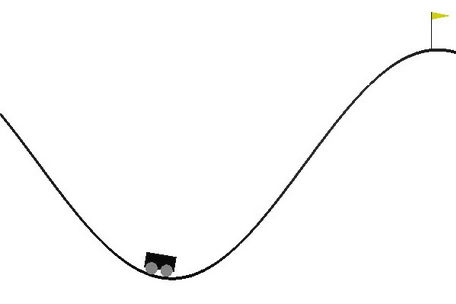

### 3.1 Simple Q Learning Agent

The results of experiments on mountain climber for Q Learning Agent are below.

State space: Box(2,)
- low: [-1.2  -0.07]
- high: [0.6  0.07]
State space samples:
[[-1.189  0.013]
 [-0.191  0.024]
 [ 0.362  0.007]
 [-0.59  -0.044]
 [-0.956 -0.021]
 [-0.984 -0.011]
 [-0.455 -0.032]
 [-0.478 -0.005]
 [-0.59  -0.066]
 [-0.815  0.024]]
Action space: Discrete(3)
Action space samples:
[2 0 2 0 1 1 1 1 1 0]
Uniform grid: [<low>, <high>] / <bins> => <splits>
    [-1.0, 1.0] / 10 => [-0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8]
    [-5.0, 5.0] / 10 => [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
Uniform grid: [<low>, <high>] / <bins> => <splits>
    [-1.0, 1.0] / 10 => [-0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8]
    [-5.0, 5.0] / 10 => [-4. -3. -2. -1.  0.  1.  2.  3.  4.]

Samples:
array([[-1.  , -5.  ],
       [-0.81, -4.1 ],
       [-0.8 , -4.  ],
       [-0.5 ,  0.  ],
       [ 0.2 , -1.9 ],
       [ 0.8 ,  4.  ],
       [ 0.81,  4.1 ],
       [ 1.  ,  5.  ]])

Discretized samples:
array([[0, 0],
       [0, 0],
       [1, 1],
       [2, 5],
       [5, 3],
       [9, 9],
 

/home/tamanous/pj/udacityNanodegree/CapstoneProjectMLNanoDegree/agents/discretize.py:80: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  locs = np.stack(grid_centers[i, discretized_samples[:, i]] for i in range(len(grid))).T  # map discretized samples



Samples:
[(-1.2, -5.1), (-0.75, 3.25), (-0.5, 0.0), (0.25, -1.9), (0.15, -1.75), (0.75, 2.5), (0.7, -3.7), (1.0, 5.0)]

Encoded samples:
[[(0, 0), (0, 0), (0, 0)], [(3, 17), (2, 16), (1, 15)], [(5, 10), (5, 10), (4, 9)], [(13, 6), (12, 6), (11, 5)], [(12, 7), (11, 6), (10, 5)], [(18, 15), (17, 15), (16, 14)], [(17, 3), (16, 2), (16, 1)], [(19, 19), (19, 19), (19, 19)]]


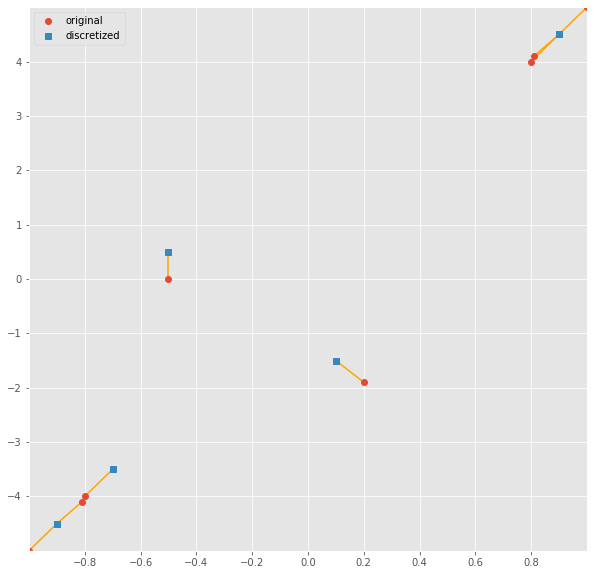

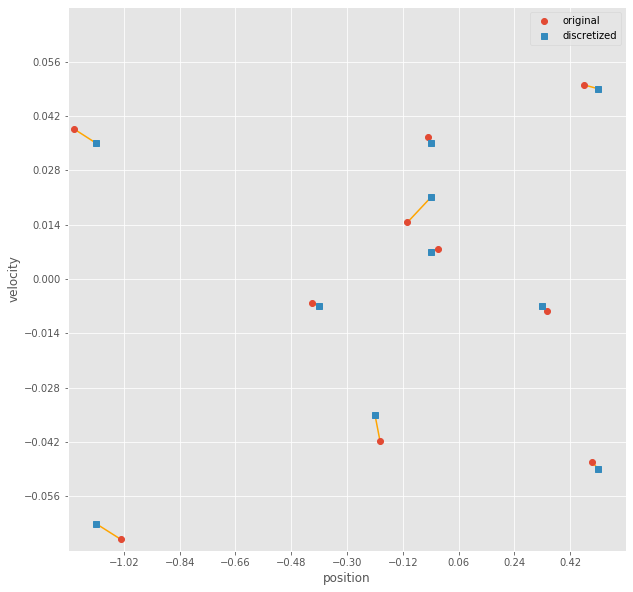

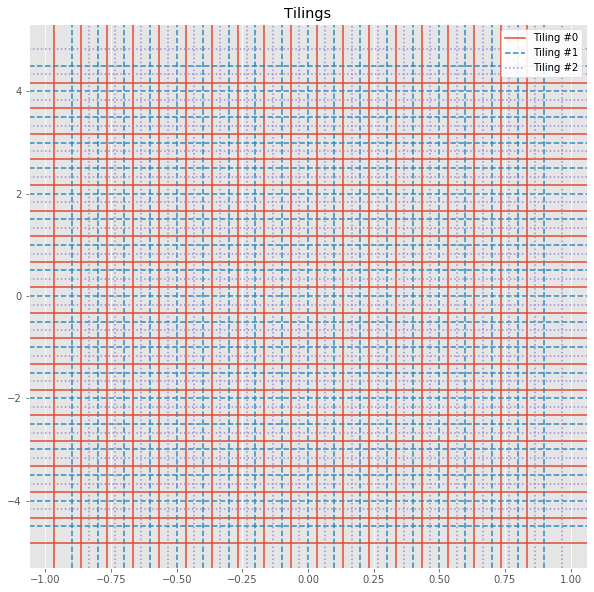

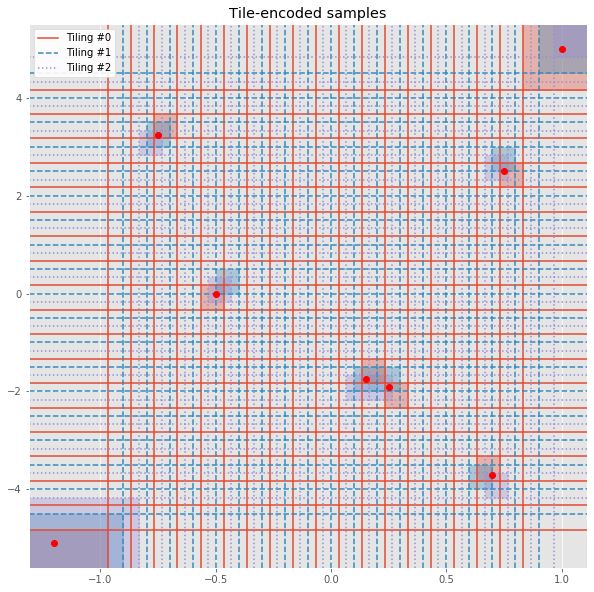

In [16]:
# First, let's take a look at the basic and tiled state discretization

from visuals import examine_environment_MountainCar_discretized, examine_environment_Acrobat_tiled

env = gym.make('MountainCar-v0')
env.seed(505);
env.reset()
examine_environment_MountainCar_discretized(env)

env = gym.make('Acrobot-v1')
env.seed(505);
env.reset()
examine_environment_Acrobat_tiled(env, 20)

Results show both discretized and disretized with tiling agents able to solve mountain climber, though not quite reliably by the solve definition of -110 over 100 trials. The tiled approach seems to have a smoother, more stable, and overall higher reward profile.

Basic Discretization


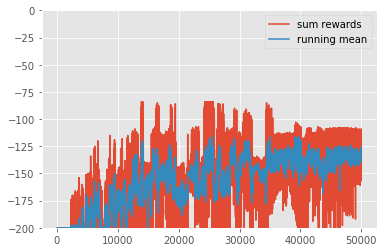

Tiled Discretization


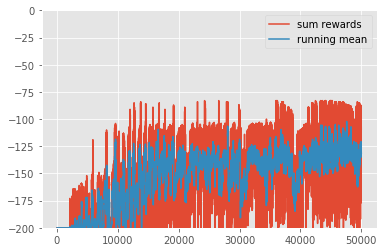

In [17]:
from visuals import plot_score_from_file

# Plot Results from 50,000 Episodes, Basic Discretization 
print("Basic Discretization")
dir = "results/MtClimber/discretized/"
plot_score_from_file(dir + "20190622223639MountainCar-v0_train.txt", -200, 0, 1)


# Plot Results from 50,000 Episodes, Tiled Discretization 
print("Tiled Discretization")
dir = "results/MtClimber/tiled/"
plot_score_from_file(dir + "20190623105243MountainCar-v0_train.txt", -200, 0, 2)

### 3.2 Deep Q Network

The results of experiments on mountain climber for Q Network Agent are below.

It was not able to successfully solve the environment.

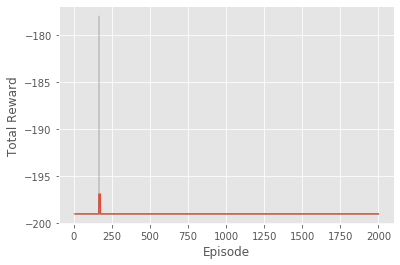

### 3.3 DDPG

The following section show the results of experiments for a Deep Deterministic Policy Gradient Agent to solve the Mountain Climber Continuous environment.

MountainCarContinuous-v0 defines "solving" as getting average reward of 90.0 over 100 consecutive trials.


##### Activation Function

" In contrast to ReLUs, ELUs have negativevalues which allows them to push mean unit activations closer to zero like batchnormalization but with lower computational complexity" [5]

ELU activation functions have gathered a lot of attention in supervised learning, with the promise of speed and better results both. A known solvable network of mountain climber using RELU activation function was changed to use ELU.

The network normally solves this environment between 50 an 100 episodes. However, with ELU, the network was unable to solve even after 250 episodes.


ELU Test 1


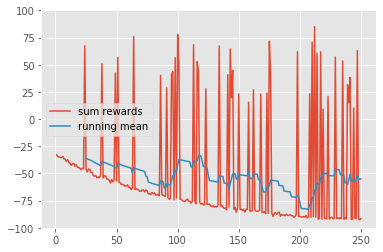

ELU Test 2


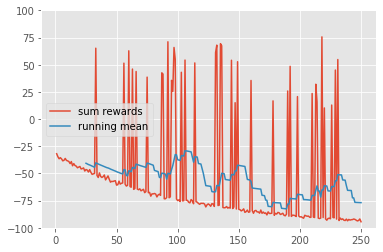

In [18]:
from visuals import plot_score_from_file

print("ELU Test 1")
dir = "results/MtClimberContinuous/elu/"
plot_score_from_file(dir + "20190622214124MountainCarContinuous-v0_train.txt", -100, 100, 1)

print("ELU Test 2")
dir = "results/MtClimberContinuous/elu/"
plot_score_from_file(dir + "20190622214130MountainCarContinuous-v0_train.txt", -100, 100, 1)

##### Initializers

Both Xavier and Variance scaling kernel initializers were attempted. Neither of these seemed to have a beneficial effect on learning. Therefore the random uniform initialize in Keras was maintained (https://keras.io/initializers/).

Xavier Initializer


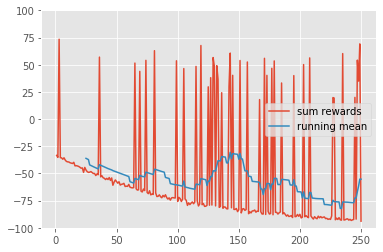

In [19]:
from visuals import plot_score_from_file

print("Xavier Initializer")
dir = "results/MtClimberContinuous/xavier/"
plot_score_from_file(dir + "20190622235529MountainCarContinuous-v0_train.txt", -100, 100, 1)

##### Network Size

Looking at three versions of the copter network, one original size, one 2x (big), and one 3x (max)

They all seem to be able to solve the environment. Generally there is an increase in training time for the larger networks to converge to a solution, though the actions by the network seems to have a more variety and sophisticated.

Copter


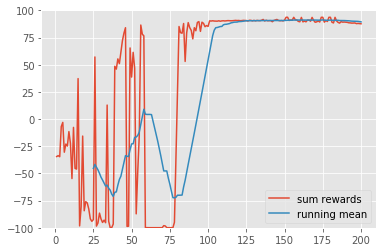

CopterBig


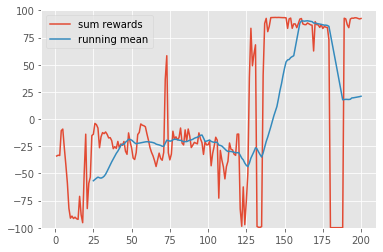

CopterMax


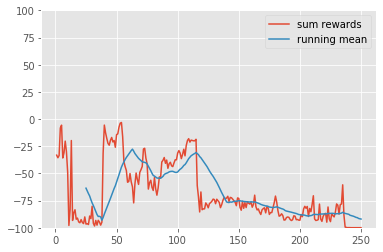

In [20]:
from visuals import plot_score_from_file

# Copter 
print("Copter")
dir = "results/MtClimberContinuous/networkSize/copter/"
plot_score_from_file(dir + "20190628162755MountainCarContinuous-v0_train.txt", -100, 100, 1)

# Copter Big
print("CopterBig")
dir = "results/MtClimberContinuous/networkSize/copterbig/"
plot_score_from_file(dir + "20190628162827MountainCarContinuous-v0_train.txt", -100, 100, 1)

# Copter Max
print("CopterMax")
dir = "results/MtClimberContinuous/networkSize/coptermax/batch32/"
plot_score_from_file(dir + "20190628173605MountainCarContinuous-v0_train.txt", -100, 100, 1)

#### Dropout 

Dropout is a long used regularization technique in DNNs [7]. It is especially common in supervised learning, but also has been used occassionally in reinforcement learning [14] .

Small levels of dropout such as 0.1 seem to neither help nor hurt learning, though performance decays after 0.3, and dropout larger than 0.5 seemed to make learning much more difficult. Dropout of 0.1 and 0.2 did seem to stabilize the learning, and make the network less vulnerable to catastophic forgetting once it had succeeded at its task.

Network size when using dropout should also be considered, though was not adjusted for here.

"If n is the number of hidden units in any layer and p is the probability of retaining a unit,then instead of n hidden units, only pn units will be present after dropout, in expectation. Moreover, this set of pn units will be different each time and the units are not allowed to build co-adaptations freely.  Therefore, if an n-sized layer is optimal for a standard neuralnet on any given task, a good dropout net should have at least n/p units." [6]

The following settings were used:


Dropout 0.0


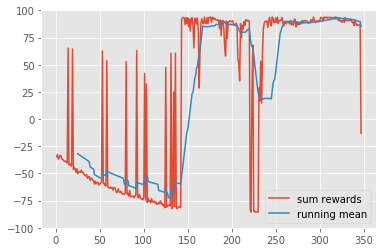

Dropout 0.2 (note QuadcoperBig network instead of Quadcopter Max)


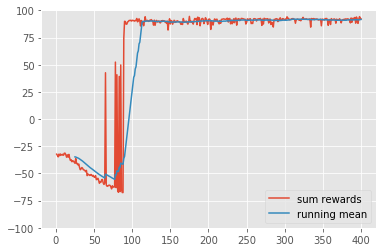

Dropout 0.3


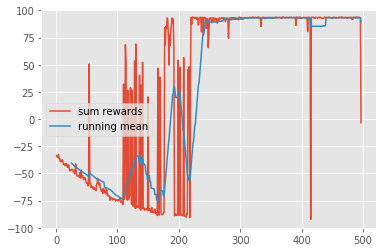

Dropout 0.5


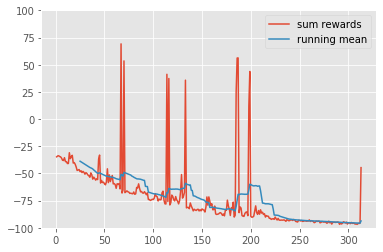

Dropout 0.7


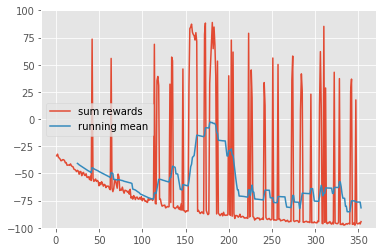

In [21]:
from visuals import plot_score_from_file

print("Dropout 0.0")
dir = "results/MtClimberContinuous/dropout/0.0/"
plot_score_from_file(dir + "20190622145327MountainCarContinuous-v0_train.txt", -100, 100, 1)

print("Dropout 0.2 (note QuadcoperBig network instead of Quadcopter Max)")
dir = "results/MtClimberContinuous/dropout/0.2/"
plot_score_from_file(dir + "20190623181645MountainCarContinuous-v0_train.txt", -100, 100, 1)

print("Dropout 0.3")
dir = "results/MtClimberContinuous/dropout/0.3/"
plot_score_from_file(dir + "20190622145438MountainCarContinuous-v0_train.txt", -100, 100, 1)

print("Dropout 0.5")
dir = "results/MtClimberContinuous/dropout/0.5/"
plot_score_from_file(dir + "20190622170332MountainCarContinuous-v0_train.txt", -100, 100, 1)

print("Dropout 0.7")
dir = "results/MtClimberContinuous/dropout/0.7/"
plot_score_from_file(dir + "20190622165506MountainCarContinuous-v0_train.txt", -100, 100, 1)

#### Regularizers

Regularizers are another common technique in superised learning. 

The application of L2 regularization however did not appear to have any benefit in reinforcement learning. While seeming to yield smoother results, it seemed to make it difficult for the agent to converge to the optimal policy. L2 levels of 0, 0.01, and 0.001 were applied to each layer of the actor and critic networks.

L2 0.0


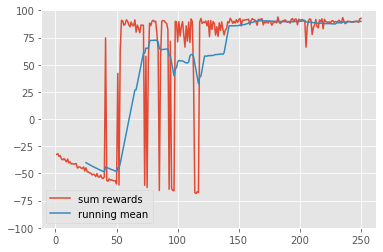

L2 0.001


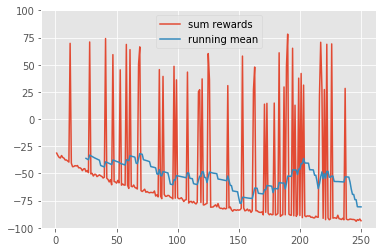

L2 0.010


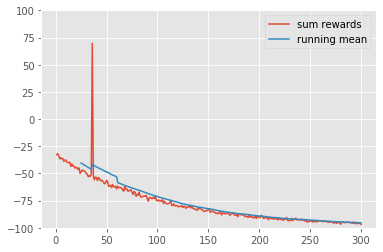

In [22]:
from visuals import plot_score_from_file

print("L2 0.0")
dir = "results/MtClimberContinuous/l2norm/0.000/"
plot_score_from_file(dir + "20190623105751MountainCarContinuous-v0_train.txt", -100, 100, 1)

print("L2 0.001")
dir = "results/MtClimberContinuous/l2norm/0.001/"
plot_score_from_file(dir + "20190623074245MountainCarContinuous-v0_train.txt", -100, 100, 1)

print("L2 0.010")
dir = "results/MtClimberContinuous/l2norm/0.010/"
plot_score_from_file(dir + "20190623113955MountainCarContinuous-v0_train.txt", -100, 100, 1)

#### Optimizer

For the DDPG agent the Adam optimiser was used. 

This network is widely used, and hence was not experimented with widely ([1], [16], [17]), since there were already too many parameters and architectural decisions to make.

AMS grad option [8] to the Adam optimizer showed faster convergence, but a more unstable solution.

ams grad


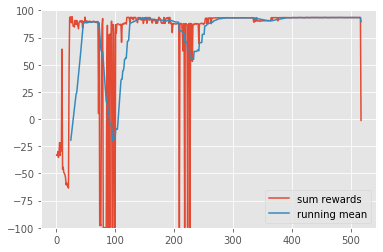

In [23]:
print("ams grad")
dir = "results/MtClimberContinuous/amsgrad/"
plot_score_from_file(dir + "20190630112548MountainCarContinuous-v0_train.txt", -100, 100, 1)

#### Learning Rate

The learning rate is one of the most fundamental and difficult parts to get right in any network. For mountain climber environment, a learning rate of 0.0001 seems to produce reasonable results. 

Learning Rate 0.001


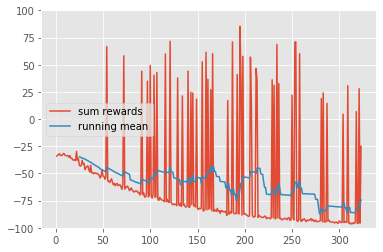

Learning Rate 0.0001 (from dropout testing)


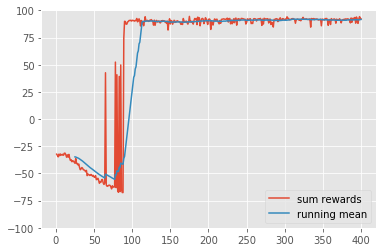

Learning Rate 0.00001


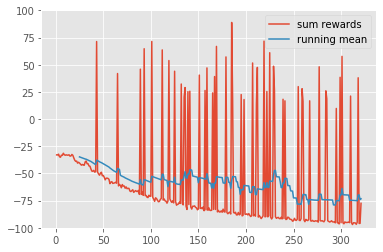

In [24]:
from visuals import plot_score_from_file

print("Learning Rate 0.001")
dir = "results/MtClimberContinuous/learningrate/0.001/"
plot_score_from_file(dir + "20190623190455MountainCarContinuous-v0_train.txt", -100, 100, 1)

print("Learning Rate 0.0001 (from dropout testing)")
dir = "results/MtClimberContinuous/dropout/0.2/"
plot_score_from_file(dir + "20190623181645MountainCarContinuous-v0_train.txt", -100, 100, 1)

print("Learning Rate 0.00001")
dir = "results/MtClimberContinuous/learningrate/0.00001/"
plot_score_from_file(dir + "20190623190506MountainCarContinuous-v0_train.txt", -100, 100, 1)

#### Action Repeat

Action repeat is meant to give the agent some ability to infer velocity. It did not seem to show any real benefit for this environment.

It would probably be more beneficial to just feed the agents previous state as a network input.

Action Repeat 3


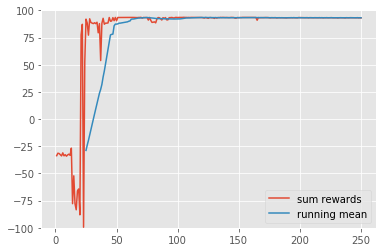

Action Repeat 5


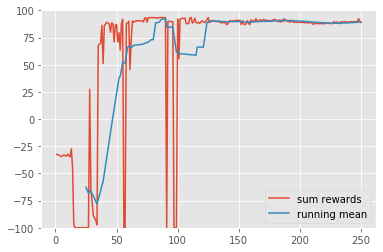

In [25]:
from visuals import plot_score_from_file

print("Action Repeat 3")
dir = "results/MtClimberContinuous/actionRepeat/3/"
plot_score_from_file(dir + "20190628174616MountainCarContinuous-v0_train.txt", -100, 100, 1)

print("Action Repeat 5")
dir = "results/MtClimberContinuous/actionRepeat/5/"
plot_score_from_file(dir + "20190628180246MountainCarContinuous-v0_train.txt", -100, 100, 1)

#### Exploration Policy

The following exploration policies were used
* Initial random exploration to fill up part of the replay buffer (used multiply by 100 of buffer size times the action size squared)
* Off after initial random actions to fill replay buffer
* Uncorrelated Noise - Decaying filter per episode
* Correleated Noise - Decaying filter per episode 
* OU Noise
* Parameter noise in the network itself

"Parameter noise helps algorithms explore their environments more effectively, leading to higher scores and more elegant behaviors. We think this is because adding noise in a deliberate manner to the parameters of the policy makes an agent’s exploration consistent across different timesteps, whereas adding noise to the action space leads to more unpredictable exploration which isn’t correlated to anything unique to the agent’s parameters." - https://openai.com/blog/better-exploration-with-parameter-noise/

Using expodentially decaying noise with a pure explore or exploit policy, resulted in more consistant and easier to tune results across agent hyper-parameter settings and environments than OU noise. 

Used a decaying exploration policy (keeping a percentage of the old exploration value after each episode finished).

Pure exploitation seems to be important to allow the agent to get the precision on its actions, as correlated to its network weights, to continue the learning process.

Of the exploration results, correlated exploration (weighted randomy and agent agent), appeared to produce more consistant and stable actions than uncorrelated (completely random actions). Paramter noise on the state and action inputs to the actor and critic appeared to damage the learning process and was overall hard to tune.

In [26]:
def sample_memory_full_enough(self):
    return self.batch_size * 100 * self.action_size * self.action_size

no exploration


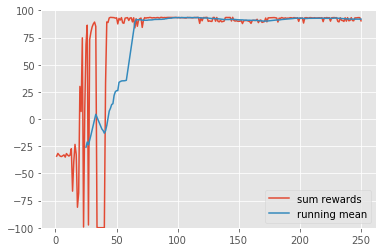

In [27]:
from visuals import plot_score_from_file

# no exploration
print("no exploration")
dir = "results/MtClimberContinuous/exploration/none/"
plot_score_from_file(dir + "20190628200134MountainCarContinuous-v0_train.txt", -100, 100, 1)

0.1 uncorrelated exploration decay


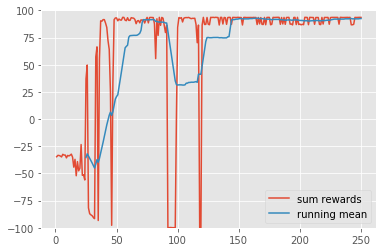

0.05 uncorrelated exploration decay


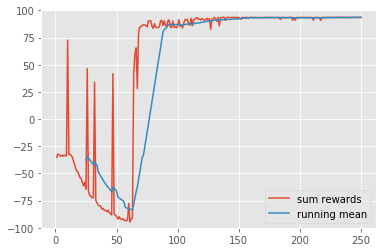

0.01 uncorrelated exploration decay


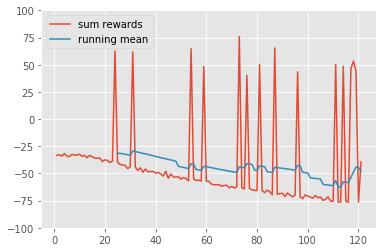

In [28]:
# uncorrelated exploration - 0.9 (0.1 decay per episode)
print("0.1 uncorrelated exploration decay")
dir = "results/MtClimberContinuous/exploration/uncorrelated/0.9/"
plot_score_from_file(dir + "20190628200353MountainCarContinuous-v0_train.txt", -100, 100, 1)

# uncorrelated exploration - 0.95 (0.05 decay per episode)
print("0.05 uncorrelated exploration decay")
dir = "results/MtClimberContinuous/exploration/uncorrelated/0.95/"
plot_score_from_file(dir + "20190628202103MountainCarContinuous-v0_train.txt", -100, 100, 1)

# uncorrelated exploration - 0.99 (0.01 decay per episode)
print("0.01 uncorrelated exploration decay")
dir = "results/MtClimberContinuous/exploration/uncorrelated/0.99/"
plot_score_from_file(dir + "20190628203409MountainCarContinuous-v0_train.txt", -100, 100, 1)

0.1 correlated exploration decay


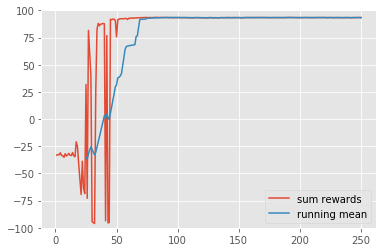

0.05 correlated exploration decay


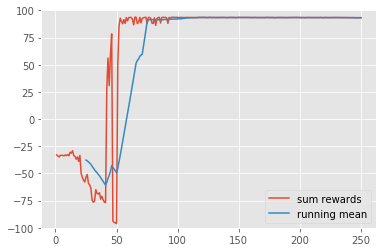

0.01 correlated exploration decay


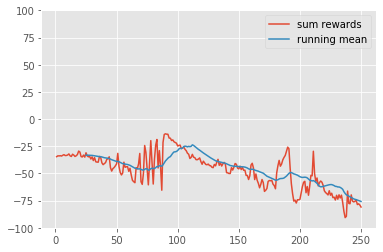

In [29]:
# correlated exploration - 0.9 (0.1 decay per episode)
print("0.1 correlated exploration decay")
dir = "results/MtClimberContinuous/exploration/correlated/0.9/"
plot_score_from_file(dir + "20190628221842MountainCarContinuous-v0_train.txt", -100, 100, 1)

# correlated exploration - 0.95 (0.05 decay per episode)
print("0.05 correlated exploration decay")
dir = "results/MtClimberContinuous/exploration/correlated/0.95/"
plot_score_from_file(dir + "20190628221908MountainCarContinuous-v0_train.txt", -100, 100, 1)

# correlated exploration - 0.99 (0.01 decay per episode)
print("0.01 correlated exploration decay")
dir = "results/MtClimberContinuous/exploration/correlated/0.99/"
plot_score_from_file(dir + "20190628223822MountainCarContinuous-v0_train.txt", -100, 100, 1)

paramnoise exploration decay - 0.01


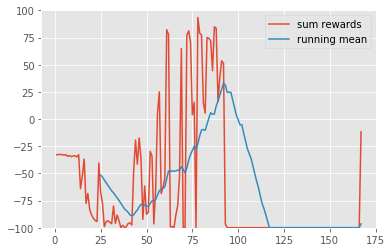

paramnoise exploration decay - 0.1


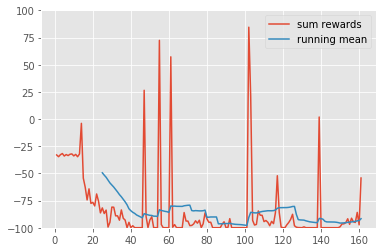

In [30]:
# parameter noise on the network - std dev 0.01
print("paramnoise exploration decay - 0.01")
dir = "results/MtClimberContinuous/exploration/paramnoise/0.01/"
plot_score_from_file(dir + "20190628212025MountainCarContinuous-v0_train.txt", -100, 100, 1)

# parameter noise on the network - std dev 0.1
print("paramnoise exploration decay - 0.1")
dir = "results/MtClimberContinuous/exploration/paramnoise/0.1/"
plot_score_from_file(dir + "20190628211302MountainCarContinuous-v0_train.txt", -100, 100, 1)

#### Random Replay Memory 

The idea with random replay is to de-couple the actions from the learning, and is widely used in both DQN and DDPG. Instead of learning from the current state, prior state, and action, which tend to be highly correlated from one step to the next, the agent instead learns randomly from memory. This allows the agent to learn multiple times from the same experience in a reasonably de-correlelated way, and makes the agent less likely to get stuck in poor behavior patterns based on its recent state and action. 

* Buffer Size: Typically values for this are in the range of 100,000 or 1,000,000 steps [1]. Most initial experiments were conducted with a buffer size of 100,000. Later this was increased to 1,000,000 to add more robustness against complicated enviroments. It seems plausable that an increased buffer size could make the learning process slower, as one is learning for events further in the past rather than capitalizing on the actions of more recently trained network.
* Batch Size: How many samples from the replay buffer to use. Common values are 32, 64, 128, and 256 samples [1]. Generally using a larger batch size seems to speed up the trainnig process.

Learning rate appeared coupled to the batch size. While larger batch sizes seem to make the agent learn faster, it also appeared that if the batch size got too large, the learning rate should be decrease to compensate for the increased learning that happens each episode as a result of the larger batch size. It appears that this is the reason for the poor performance of batch size 1024, when compared to 256.

batch size 32


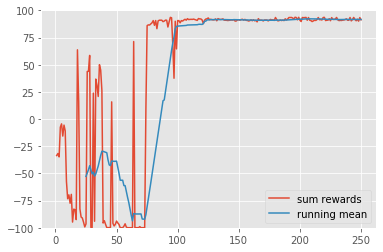

batch size 128


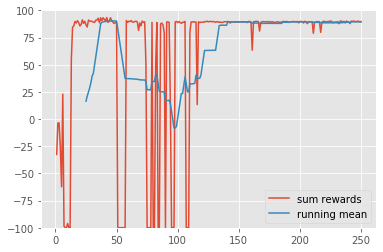

batch size 256


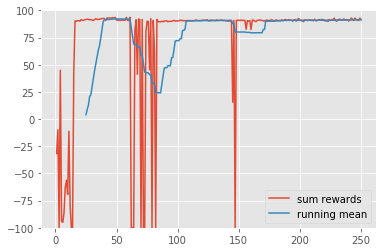

batch size 512


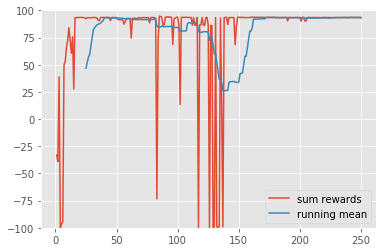

batch size 1024


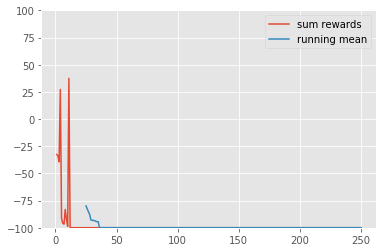

In [31]:
# Buffer Size 32
print("batch size 32")
dir = "results/MtClimberContinuous/batchsize/32/"
plot_score_from_file(dir + "20190628224957MountainCarContinuous-v0_train.txt", -100, 100, 1)

# Buffer Size 128
print("batch size 128")
dir = "results/MtClimberContinuous/batchsize/128/"
plot_score_from_file(dir + "20190629091604MountainCarContinuous-v0_train.txt", -100, 100, 1)

# Buffer Size 256
print("batch size 256")
dir = "results/MtClimberContinuous/batchsize/256/"
plot_score_from_file(dir + "20190629144525MountainCarContinuous-v0_train.txt", -100, 100, 1)

# Buffer Size 512
print("batch size 512")
dir = "results/MtClimberContinuous/batchsize/512/"
plot_score_from_file(dir + "20190629003527MountainCarContinuous-v0_train.txt", -100, 100, 1)

# Buffer Size 1024
print("batch size 1024")
dir = "results/MtClimberContinuous/batchsize/1024/"
plot_score_from_file(dir + "20190629144605MountainCarContinuous-v0_train.txt", -100, 100, 1)

#### Batch Normalization

A fully batch normalized network (applied at each later), did could solve the environment. However it seems to struggle with having actions that were too sharp, preferring smooth action behaviors.

paramnoise exploration decay - 0.1


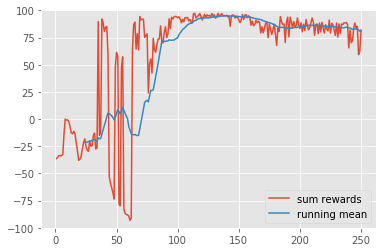

In [32]:
# parameter noise on the network - std dev 0.1
print("paramnoise exploration decay - 0.1")
dir = "results/MtClimberContinuous/batchnorm/all/"
plot_score_from_file(dir + "20190629152238MountainCarContinuous-v0_train.txt", -100, 100, 1)

#### Learning Frequency

The idea here was to use larger batches, but less often, as a trade-off to avoid loading and unloading the GPU all the time. Instead of learning each step, the DDPG agent will use a 10x larger batch size, but learn 10x less frequently. While this does not reduce the number of episodes needed to train the agent, it does speed up the overall time needed to train the agent over all episodes.

Unfortunately this approach did not seem to really help the learning process, and was hence abandoned.

#### Soft Update

Turning off soft updates had a destabilizing effect on the agent, as shown below

no soft update


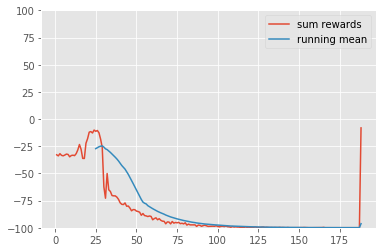

In [33]:
print("no soft update")
dir = "results/MtClimberContinuous/noSoftUpdate/"
plot_score_from_file(dir + "20190629182336MountainCarContinuous-v0_train.txt", -100, 100, 1)

Below are results for different values of the soft update tau parameter.

tau 0.1


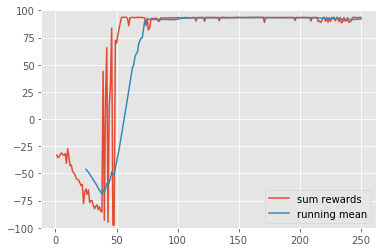

tau 0.01


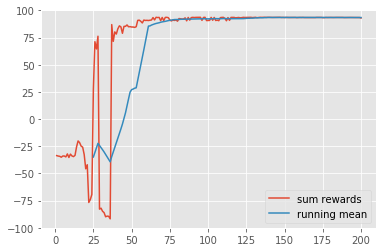

tau 0.001


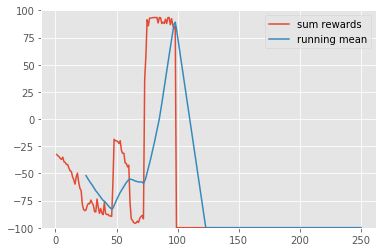

In [34]:
# Tau 0.1
print("tau 0.1")
dir = "results/MtClimberContinuous/tau/0.1/"
plot_score_from_file(dir + "20190630133131MountainCarContinuous-v0_train.txt", -100, 100, 1)

# Tau 0.01
print("tau 0.01")
dir = "results/MtClimberContinuous/tau/0.01/"
plot_score_from_file(dir + "20190629195726MountainCarContinuous-v0_train.txt", -100, 100, 1)

# Tau 0.001
print("tau 0.001")
dir = "results/MtClimberContinuous/tau/0.001/"
plot_score_from_file(dir + "20190630120155MountainCarContinuous-v0_train.txt", -100, 100, 1)

#### Summary 

Effective
* Larger batch size
* Tuning the learning rate
* Soft updates

Unclear
* Dropout (at least didn't seem to hurt, and provided stability and regularization against overfitting, so will be maintained)
* Small amount of exploration, correlated (seemed slightly better) or uncorrelated, with 5-10% decay per episode
* larger amount of neurons per layer. This didn't seem to hurt the ability to learn, though with more parameters learning look longer per episode, and took longer to converge to a solution
* Action repeat. Did not seem to provide any benefit, but didn't seem to hurt either. Can further evaluate on other environments
* Batch normalization. Smoothes out the agents actions, however slows down learning (both in training time per episode, and in number of episodes to find a solution), and makes the final result less stable. Batch normalization appears to make fine control more difficult.

Ineffective
* L2 regularization. This appears to make the agents actions 
* ELU activation function instead of RELU. Did not appear to provide any benefit.
* Learning Frequency. Didn't appear to add any value.
* Large amount of exploration (1% decay). Generally this made the agent perform much worse.
* Network input noise as exploration.

#### Final Agent Settings 

The following agent performed well, learning fast, with performance stable after rearch the desired reward level. The agent solves in around 35 episodes, doing well compared to the leaderboard on OpenAI (https://github.com/openai/gym/wiki/Leaderboard), with even faster solution possible (~20 episodes) if the initial randomy exploration period to fill memory is shorter.

* Batch size: 128
* Memory size: 1,000,000
* Learning Rate: 0.0001
* Soft Updates: ON. Tau soft update rate: 0.01
* Batch size * 25 memory warm up with random actions, then correleated exploration with 5% decay per episode
* Network: CopterBig (will change to max if learning appears to plateau in other environments, and batch norm is still an option)
* Action Repeat: 2
* Dropout: 0.2, all hidden layers
* Discount Factor: 0.99

final


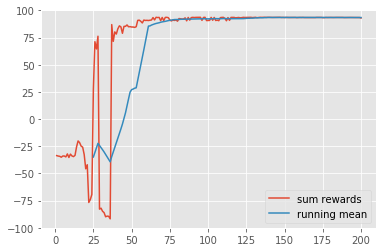

In [35]:
print("final")
dir = "results/MtClimberContinuous/final/"
plot_score_from_file(dir + "20190629195726MountainCarContinuous-v0_train.txt", -100, 100, 1)

-----------------------------------------------------------
New Experiment, training output file name:  20190702232654MountainCarContinuous-v0_train.txt
env.observation_space:  (2,)
*************************************
*************************************
Initializing DDPG Agent
	Environment:  <TimeLimit<Continuous_MountainCarEnv<MountainCarContinuous-v0>>>
env.action_space.shape (1,)
env.action_space.low [-1.]
env.action_space.high [1.]
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
*** init actor ***
self.action_range:  [2.]
*** init actor ***
self.action_range:  [2.]
*************************************
*** DDPG Agent Paramter ***
- network architecture chosen:  QuadCopterBig
[ ACTOR MODEL SUMMARY ]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (Input

	step:  400 , action: [0.126]
	step:  500 , action: [0.143]
	step:  600 , action: [-0.203]
	step:  700 , action: [0.46]
	step:  800 , action: [0.798]
	step:  900 , action: [0.045]
Episode =    4 (duration of 999 steps); Reward = -32.801 (best = -32.801, in epi 4)   
	Episode training time:  0.24546456336975098
	resetting episode... next explore_p:  1.0
Garbage collector: collected 0 objects.
	step:  0 , action: [0.682]
	step:  100 , action: [0.815]
	step:  200 , action: [0.106]
	step:  300 , action: [-0.746]
	step:  400 , action: [-0.416]
	step:  500 , action: [0.218]
	step:  600 , action: [0.132]
	step:  700 , action: [0.023]
	step:  800 , action: [-0.005]
	step:  900 , action: [-0.624]
Episode =    5 (duration of 999 steps); Reward = -33.651 (best = -32.801, in epi 4)   
	Episode training time:  0.2534658908843994
	resetting episode... next explore_p:  1.0
Garbage collector: collected 0 objects.
	step:  0 , action: [0.356]
	step:  100 , action: [0.259]
	step:  200 , action: [0.438]
	

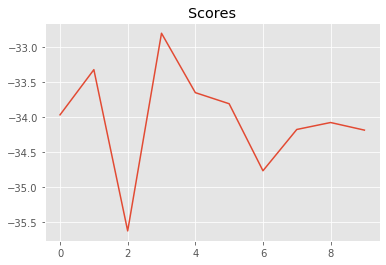

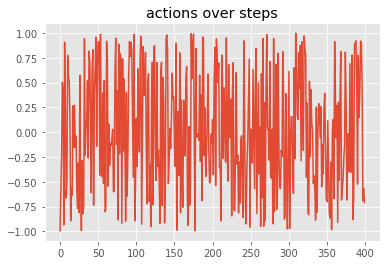

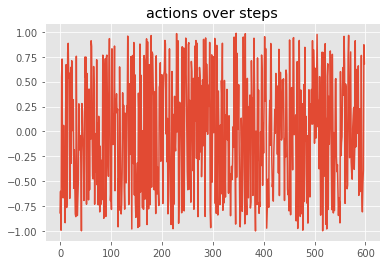

Episode =   10 (duration of 999 steps); Reward = -34.188 (best = -32.801, in epi 4)   
	Episode training time:  0.8737530708312988
	resetting episode... next explore_p:  1.0
Garbage collector: collected 8016 objects.
	step:  0 , action: [-0.904]
	step:  100 , action: [-0.286]
	step:  200 , action: [-0.571]
	step:  300 , action: [-0.829]
	step:  400 , action: [0.637]
	step:  500 , action: [0.486]
	step:  600 , action: [-0.374]
	step:  700 , action: [-0.263]
	step:  800 , action: [0.747]
	step:  900 , action: [0.111]
Episode =   11 (duration of 999 steps); Reward = -31.927 (best = -31.927, in epi 11)   
	Episode training time:  0.26170992851257324
	resetting episode... next explore_p:  1.0
Garbage collector: collected 0 objects.
	step:  0 , action: [0.24]
	step:  100 , action: [-0.826]
	step:  200 , action: [-0.965]
	step:  300 , action: [-0.789]
	step:  400 , action: [0.459]
	step:  500 , action: [-0.925]
	step:  600 , action: [-0.065]
	step:  700 , action: [0.099]
	step:  800 , action:

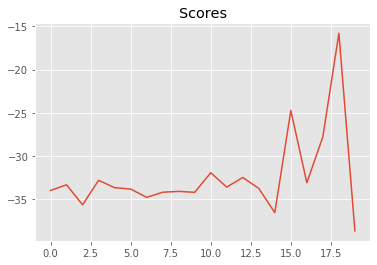

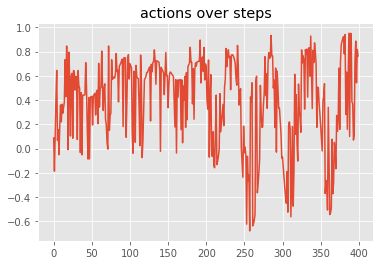

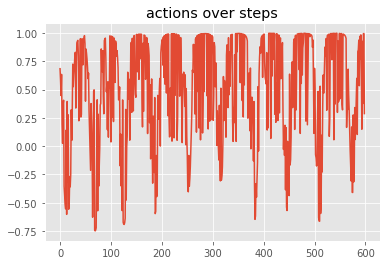

Episode =   20 (duration of 999 steps); Reward = -38.647 (best = -15.810, in epi 19)   
	Episode training time:  27.989524602890015
	resetting episode... next explore_p:  0.43046721000000016
Garbage collector: collected 8096 objects.
	step:  0 , action: [0.998]
	step:  100 , action: [0.312]
	step:  200 , action: [0.999]
	step:  300 , action: [0.799]
	step:  400 , action: [0.979]
	step:  500 , action: [1.]
	step:  600 , action: [1.]
	step:  700 , action: [0.993]
	step:  800 , action: [0.747]
	step:  900 , action: [0.342]
Episode =   21 (duration of 999 steps); Reward = -69.705 (best = -15.810, in epi 19)   
	Episode training time:  28.524041891098022
	resetting episode... next explore_p:  0.38742048900000015
Garbage collector: collected 0 objects.
	step:  0 , action: [0.743]
	step:  100 , action: [0.811]
	step:  200 , action: [0.868]
	step:  300 , action: [0.995]
	step:  400 , action: [0.548]
	step:  500 , action: [0.993]
	step:  600 , action: [0.986]
	step:  700 , action: [0.04]
	step:

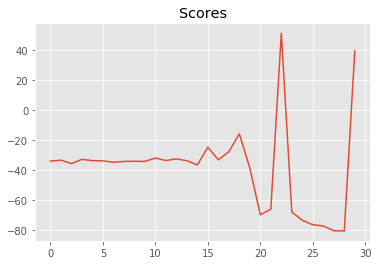

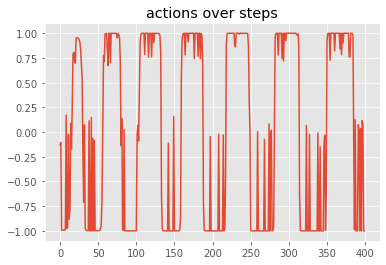

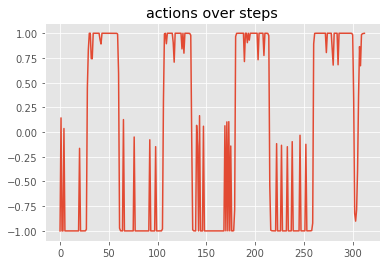

Episode =   30 (duration of 713 steps); Reward =  39.367 (best =  51.107, in epi 23)   
	Episode training time:  20.833544969558716
	resetting episode... next explore_p:  0.1500946352969992
Garbage collector: collected 8211 objects.
	step:  0 , action: [1.]
	step:  100 , action: [1.]
	step:  200 , action: [0.999]
	step:  300 , action: [1.]
	step:  400 , action: [1.]
	step:  500 , action: [1.]
	step:  600 , action: [0.999]
	step:  700 , action: [0.999]
	step:  800 , action: [1.]
	step:  900 , action: [0.807]
Episode =   31 (duration of 999 steps); Reward = -95.245 (best =  51.107, in epi 23)   
	Episode training time:  28.290242671966553
	resetting episode... next explore_p:  0.13508517176729928
Garbage collector: collected 0 objects.
	step:  0 , action: [1.]
	step:  100 , action: [0.799]
	step:  200 , action: [1.]
	step:  300 , action: [0.999]
	step:  400 , action: [0.985]
	step:  500 , action: [1.]
	step:  600 , action: [0.999]
	step:  700 , action: [0.998]
	step:  800 , action: [1.]


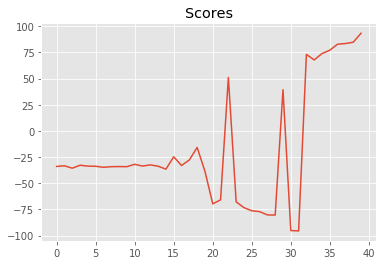

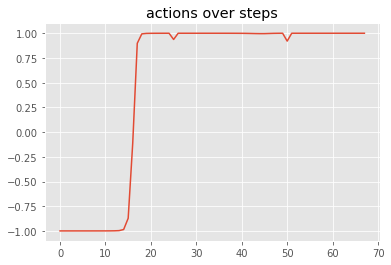

Episode =   40 (duration of 68 steps); Reward =  93.379 (best =  93.379, in epi 40)   
	Episode training time:  2.374979019165039
	resetting episode... next explore_p:  0.0523347633027361
Garbage collector: collected 5704 objects.
	step:  0 , action: [0.984]
Episode =   41 (duration of 88 steps); Reward =  91.658 (best =  93.379, in epi 40)   
	Episode training time:  2.588493585586548
	resetting episode... next explore_p:  0.04710128697246249
Garbage collector: collected 0 objects.
	step:  0 , action: [-1.]
Episode =   42 (duration of 68 steps); Reward =  93.695 (best =  93.695, in epi 42)   
	Episode training time:  2.027339220046997
	resetting episode... next explore_p:  0.042391158275216244
Garbage collector: collected 0 objects.
	step:  0 , action: [-1.]
Episode =   43 (duration of 69 steps); Reward =  93.466 (best =  93.695, in epi 42)   
	Episode training time:  2.051157236099243
	resetting episode... next explore_p:  0.03815204244769462
Garbage collector: collected 0 objects.
	

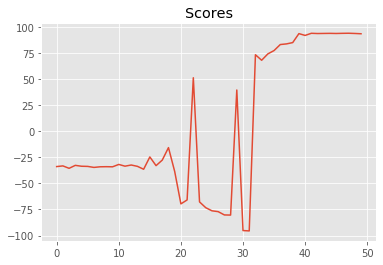

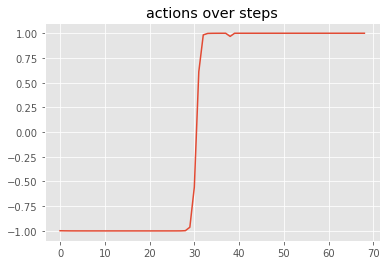

Episode =   50 (duration of 69 steps); Reward =  93.250 (best =  93.741, in epi 48)   
	Episode training time:  2.415736675262451
	resetting episode... next explore_p:  0.01824800363140075
Garbage collector: collected 5514 objects.
	step:  0 , action: [-0.991]
Episode =   51 (duration of 72 steps); Reward =  93.001 (best =  93.741, in epi 48)   
	Episode training time:  2.1458795070648193
	resetting episode... next explore_p:  0.016423203268260675
Garbage collector: collected 0 objects.
	step:  0 , action: [-0.316]
Episode =   52 (duration of 67 steps); Reward =  93.757 (best =  93.757, in epi 52)   
	Episode training time:  1.9750664234161377
	resetting episode... next explore_p:  0.014780882941434608
Garbage collector: collected 0 objects.
	step:  0 , action: [-0.999]
Episode =   53 (duration of 69 steps); Reward =  93.461 (best =  93.757, in epi 52)   
	Episode training time:  1.997215986251831
	resetting episode... next explore_p:  0.013302794647291147
Garbage collector: collected 

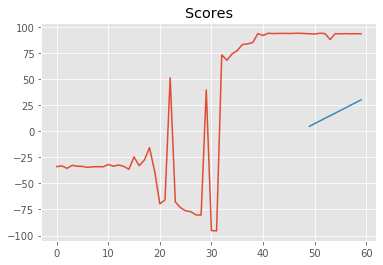

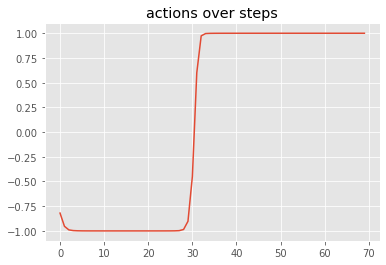

Episode =   60 (duration of 70 steps); Reward =  93.217 (best =  93.757, in epi 52)   
	Episode training time:  2.390305995941162
	resetting episode... next explore_p:  0.00636268544113595
Garbage collector: collected 5564 objects.
	step:  0 , action: [0.978]
	step:  100 , action: [1.]
Episode =   61 (duration of 132 steps); Reward =  87.304 (best =  93.757, in epi 52)   
	Episode training time:  3.858700752258301
	resetting episode... next explore_p:  0.005726416897022355
Garbage collector: collected 0 objects.
	step:  0 , action: [-1.]
Episode =   62 (duration of 68 steps); Reward =  93.363 (best =  93.757, in epi 52)   
	Episode training time:  2.0011556148529053
	resetting episode... next explore_p:  0.00515377520732012
Garbage collector: collected 0 objects.
	step:  0 , action: [0.966]
	step:  100 , action: [1.]
Episode =   63 (duration of 130 steps); Reward =  87.430 (best =  93.757, in epi 52)   
	Episode training time:  3.8628182411193848
	resetting episode... next explore_p:  

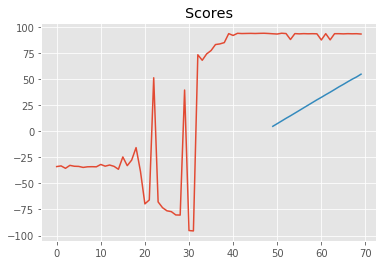

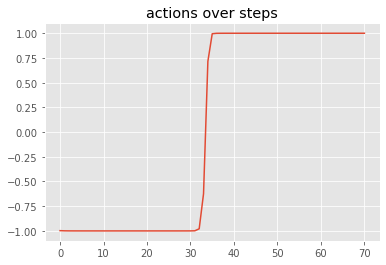

Episode =   70 (duration of 71 steps); Reward =  93.016 (best =  93.757, in epi 52)   
	Episode training time:  2.461416244506836
	resetting episode... next explore_p:  0.0022185312344622636
Garbage collector: collected 5644 objects.
	step:  0 , action: [-1.]
Episode =   71 (duration of 67 steps); Reward =  93.612 (best =  93.757, in epi 52)   
	Episode training time:  2.006866931915283
	resetting episode... next explore_p:  0.001996678111016037
Garbage collector: collected 0 objects.
	step:  0 , action: [-1.]
Episode =   72 (duration of 68 steps); Reward =  93.316 (best =  93.757, in epi 52)   
	Episode training time:  2.019381284713745
	resetting episode... next explore_p:  0.0017970102999144335
Garbage collector: collected 0 objects.
	step:  0 , action: [-1.]
Episode =   73 (duration of 71 steps); Reward =  93.066 (best =  93.757, in epi 52)   
	Episode training time:  2.117708206176758
	resetting episode... next explore_p:  0.0016173092699229901
Garbage collector: collected 0 objec

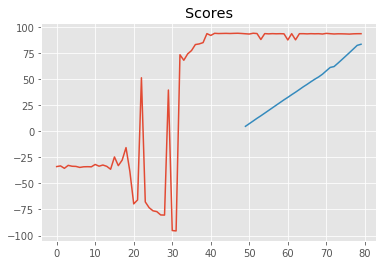

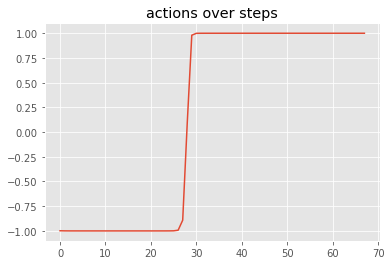

Episode =   80 (duration of 68 steps); Reward =  93.326 (best =  93.757, in epi 52)   
	Episode training time:  2.3524293899536133
	resetting episode... next explore_p:  0.0007735540101454295
Garbage collector: collected 5704 objects.
	step:  0 , action: [-1.]
Episode =   81 (duration of 67 steps); Reward =  93.403 (best =  93.757, in epi 52)   
	Episode training time:  1.9794421195983887
	resetting episode... next explore_p:  0.0006961986091308866
Garbage collector: collected 0 objects.
	step:  0 , action: [-1.]
Episode =   82 (duration of 68 steps); Reward =  93.298 (best =  93.757, in epi 52)   
	Episode training time:  2.011418342590332
	resetting episode... next explore_p:  0.0006265787482177979
Garbage collector: collected 0 objects.
	step:  0 , action: [-1.]
Episode =   83 (duration of 69 steps); Reward =  93.212 (best =  93.757, in epi 52)   
	Episode training time:  2.028540849685669
	resetting episode... next explore_p:  0.0005639208733960181
Garbage collector: collected 0 ob

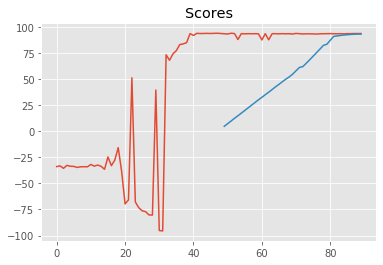

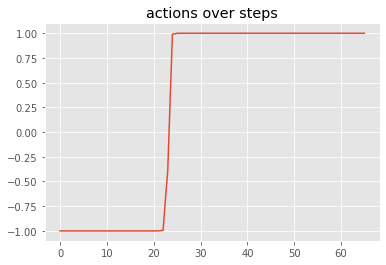

Episode =   90 (duration of 66 steps); Reward =  93.488 (best =  93.757, in epi 52)   
	Episode training time:  2.279244899749756
	resetting episode... next explore_p:  0.00026972160559060804
Garbage collector: collected 5384 objects.
	step:  0 , action: [-1.]
Episode =   91 (duration of 66 steps); Reward =  93.499 (best =  93.757, in epi 52)   
	Episode training time:  1.8783533573150635
	resetting episode... next explore_p:  0.00024274944503154723
Garbage collector: collected 0 objects.
	step:  0 , action: [-1.]
Episode =   92 (duration of 67 steps); Reward =  93.389 (best =  93.757, in epi 52)   
	Episode training time:  2.0192959308624268
	resetting episode... next explore_p:  0.00021847450052839252
Garbage collector: collected 0 objects.
	step:  0 , action: [-1.]
Episode =   93 (duration of 66 steps); Reward =  93.469 (best =  93.757, in epi 52)   
	Episode training time:  1.9497535228729248
	resetting episode... next explore_p:  0.00019662705047555326
Garbage collector: collected

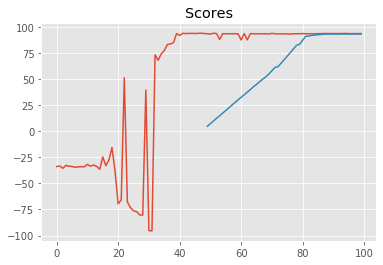

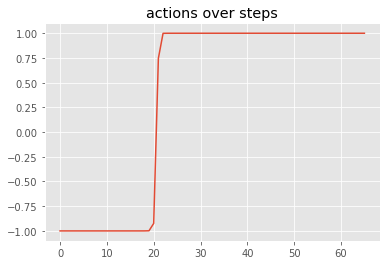

Episode =  100 (duration of 66 steps); Reward =  93.459 (best =  93.757, in epi 52)   
	Episode training time:  2.316049575805664

******************************

*** All episodes training time (HH:MM:SS):  0:11:45.021954
	Average training time per episode:  7.050219540596008
******************************
[TEST] Training Done, now running tests...
	resetting episode... next explore_p:  9.404610869860067e-05
Garbage collector: collected 5449 objects.
	step:  0 , action: [-1.]
	step:  50 , action: [1.]


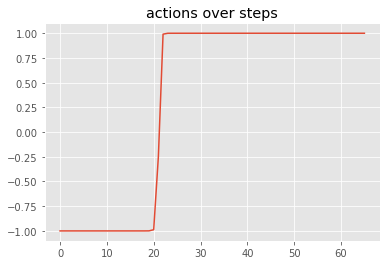

	resetting episode... next explore_p:  8.464149782874061e-05
Garbage collector: collected 2712 objects.
	step:  0 , action: [-1.]
	step:  50 , action: [1.]


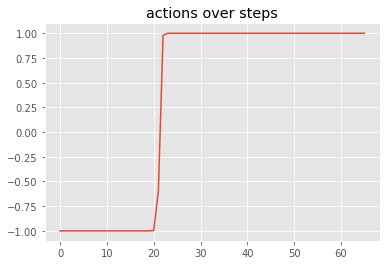

	resetting episode... next explore_p:  7.617734804586655e-05
Garbage collector: collected 2712 objects.
	step:  0 , action: [-1.]
	step:  50 , action: [1.]


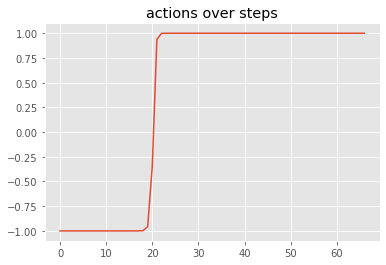


******************************

*** All episodes training time (HH:MM:SS):  0:00:01.096472
	Average training time per episode:  0.3654906749725342
******************************


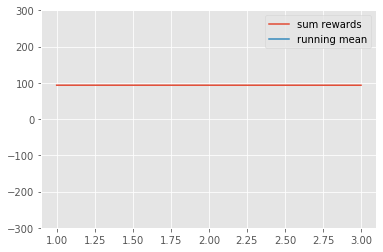

Final score: 93.53995681524269


In [36]:
import gym
import numpy as np

"""
# Create an environment and set random seed
"""
selectedEnvironment = 6
env = 0
envName = 0

# Toy Text - Discrete state and action space
if selectedEnvironment == 0:
    envName = 'Taxi-v2'

# Classic Control - Continuous State and Discrete Action Spaces
elif selectedEnvironment == 1: 
    envName = 'MountainCar-v0' # needs Discretized or better
elif selectedEnvironment == 2: 
    envName = 'Acrobot-v1'     # needs Discretized, Tile Encoding or better
elif selectedEnvironment == 3: 
    envName = 'CartPole-v1'    # needs Deep Q Learning to do well?

# Box 2D - Continuous State, Discrete Actions
elif selectedEnvironment == 4: 
    envName = 'LunarLander-v2' # discrete actions, continuous state

# Classic Control - Continuous State and Action Spaces
elif selectedEnvironment == 5: 
    envName = 'Pendulum-v0' # continuous only
elif selectedEnvironment == 6: 
    envName = 'MountainCarContinuous-v0' # continuous only

# Box 2D - Continuous State and Action Spaces
elif selectedEnvironment == 7:
    envName = 'LunarLanderContinuous-v2' # continuous only
elif selectedEnvironment == 8: 
    envName = 'BipedalWalker-v2'  # continuous only

# Box 2D - Image State and Continuous Action Spaces   
elif selectedEnvironment == 9: 
    envName = 'CarRacing-v0'      #  image input, actions [steer, gas, brake]

# Initialize the environment
env = gym.make(envName)
env.reset()

# Set output file paths based on environment
from visuals import examine_environment, examine_environment_MountainCar_discretized, examine_environment_Acrobat_tiled
#examine_environment(env)

from datetime import datetime
FORMAT = '%Y%m%d%H%M%S'
file_output_train = envName + '_train.txt'       # file name for saved results
file_output_test = envName + '_test.txt'       # file name for saved results
file_output_train = datetime.now().strftime(FORMAT) + file_output_train

print('-----------------------------------------------------------')
print('New Experiment, training output file name: ', file_output_train)

"""
# Create Agent
"""
agent = 0
selectedAgent = 2
if selectedAgent == 0:
    # create the agent discretized state space Q Learning
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    print("env.observation_space.shape[0]", state_size)
    print("env.action_space", action_size)
    from agents import QLearningAgentDiscretized as qlad
    agent = qlad.QLearningAgent(env)
#    examine_environment_MountainCar_discretized(env)

if selectedAgent == 1:
    # create the agent for tiled state space Q Learning
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    print("env.observation_space.shape[0]", state_size)
    print("env.action_space", action_size)
    from agents import QLearningAgentDiscretizedTiles as qlat
    agent = qlat.QLearningAgentDisTiles(env)
#    examine_environment_Acrobat_tiled(env, n_bins)

if selectedAgent == 2:
    # Create DDPG network agent
    obsSpace = env.observation_space.shape
    print("env.observation_space: ", obsSpace)
    from agents.DDPG import DDPG
    agent = DDPG(env, "continousStateAction")  # continousStateAction imageStateContinuousAction

if selectedAgent == 3:
    # Create DDPG network agent
    obsSpace = env.observation_space.shape
    print("env.observation_space: ", obsSpace)
    from agents.DDPG import DDPG
    agent = DDPG(env, "imageStateContinuousAction")  # continousStateAction imageStateContinuousAction
    
"""
# run the simulation
"""
import interact as sim
num_episodes=100
sim.interact(agent, env, num_episodes, mode='train', file_output=file_output_train, renderSkip=100)

"""
# Run in test mode and analyze scores obtained
"""
print("[TEST] Training Done, now running tests...")
test_scores = sim.interact(agent, env, num_episodes=3, mode='test', file_output=file_output_test)
plot_score_from_file(file_output_test, -300, 300, 1)

"""
# Watch Agent
"""
state = env.reset()
score = 0
for t in range(5000):
    # get action from agent
    action = agent.act(state, mode='test')
       
    # show environment and step it forward
    env.render()
    state, reward, done, _ = env.step(action)
    score += reward
    if done:
        break 
print('Final score:', score)

"""
# Exit Environment
"""
env.close()
del agent 

### Comparing Q-Table, Q-Network, and DDPG

The Q table, Q Network, have the relatively simpler task of solving an environment where the action space has been discretized into two values, -1 and 1. The DDPG agent is challenged with solving the more challenging continuous action space between -1 and 1.

* Q-Table was able to get close to solving the discrete action version of Mt Climber in around 50,000 episdes
* Q-Network was unable to solve the discrete version of Mt Climber in 2000 episodes, appearing to get stuck in a bad policy
* DDPG Agent was able to solve the continuous (more challenging than discrete) version of Mt Climber in around 35 episodes.



## 4. Lunar Lander

"LunarLander-v2 / LunarLanderContinuous-v2

Landing pad is always at coordinates (0,0). Coordinates are the first two numbers in state vector. Reward for moving from the top of the screen to landing pad and zero speed is about 100..140 points. If lander moves away from landing pad it loses reward back. Episode finishes if the lander crashes or comes to rest, receiving additional -100 or +100 points. Each leg ground contact is +10. Firing main engine is -0.3 points each frame. Solved is 200 points. Landing outside landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land on its first attempt. Action is two real values vector from -1 to +1. First controls main engine, -1..0 off, 0..+1 throttle from 50% to 100% power. Engine can't work with less than 50% power. Second value -1.0..-0.5 fire left engine, +0.5..+1.0 fire right engine, -0.5..0.5 off."

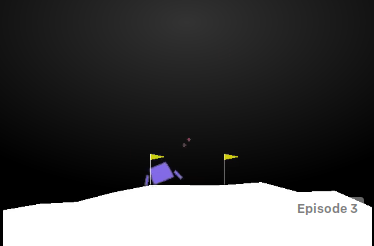

### 4.1 Simple Q Learning Agent

The results of 25,000 episodes of the Q learning agent are below. 

Unlike Mt Climber environment, the simple Q learning agent was unable to get anywhere close to solving this environment (solve is 200 points). Additionally, the agent does not appear to be showing any upward process in running mean reward.

lunar lander with simple discretized Q learning agent


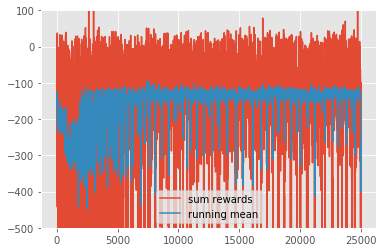

In [37]:
print("lunar lander with simple discretized Q learning agent")
dir = "results/lunarlander/"
plot_score_from_file(dir + "20190629195846LunarLander-v2_train.txt", -500, 100, 1)

### 4.2 DDPG

With the Mt Climber settings this network was able to show control of the boosters to stabilize the agent flight. However, the agent was not able to solve the enviroment.

LR 0.0001


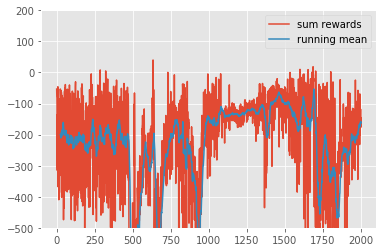

LR 0.0002


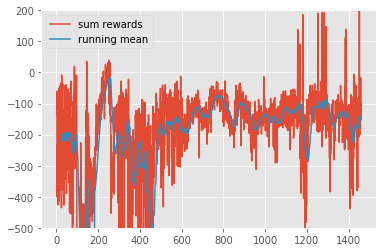

LR 0.0003


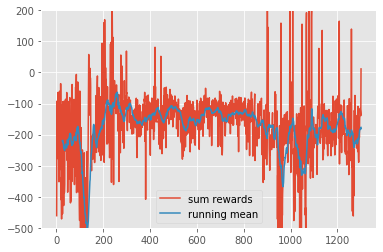

In [38]:
print("LR 0.0001")
dir = "results/lunarlandercontinuous/learningRate/0.0001/"
plot_score_from_file(dir + "20190629203656LunarLanderContinuous-v2_train.txt", -500, 200, 1)

print("LR 0.0002")
dir = "results/lunarlandercontinuous/learningRate/0.0002/"
plot_score_from_file(dir + "20190629224211LunarLanderContinuous-v2_train.txt", -500, 200, 1)

print("LR 0.0003")
dir = "results/lunarlandercontinuous/learningRate/0.0003/"
plot_score_from_file(dir + "20190630081636LunarLanderContinuous-v2_train.txt", -500, 200, 1)


## 5. Bipedal Walker

Since this environment is continuous Action Spaces Only, it was only compatiable with the DDPG agent.

"BipedalWalker-v2

Reward is given for moving forward, total 300+ points up to the far end. If the robot falls, it gets -100. Applying motor torque costs a small amount of points, more optimal agent will get better score. State consists of hull angle speed, angular velocity, horizontal speed, vertical speed, position of joints and joints angular speed, legs contact with ground, and 10 lidar rangefinder measurements. There's no coordinates in the state vector."

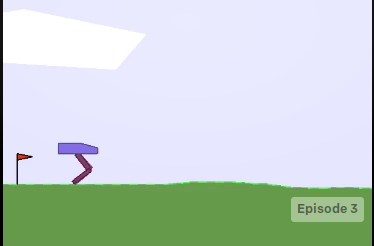

### 5.1 DDPG

The agent was able to demonstate walking, however was not able to solve the environment.

LR 0.0001


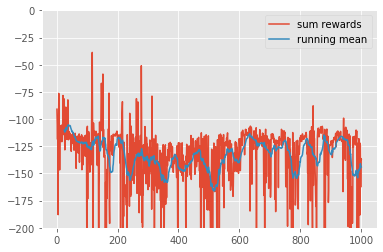

LR 0.0005


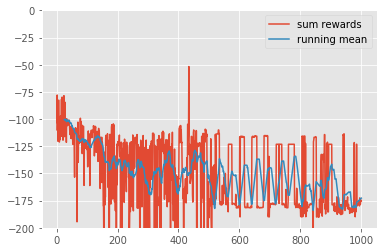

In [39]:
from visuals import plot_score_from_file

print("LR 0.0001")
dir = "results/walker/learningrate/0.0001/"
plot_score_from_file(dir + "20190630222542BipedalWalker-v2_train.txt", -200, 0, 1)

print("LR 0.0005")
dir = "results/walker/learningrate/0.0005/"
plot_score_from_file(dir + "20190630222529BipedalWalker-v2_train.txt", -200, 0, 1)

## 6. Racing Car

This final agent needed some special supporting functions to pre-process image data. Functions to normalize the image to the range of 0-1, and convert to grayscale, we used based on the DDQN reference agent from the OpenAI gym leaderboard.


In [40]:
"""
# Sets all pixel values to be between (0,1)
# Parameters:
# - image: A grayscale (nxmx1) or RGB (nxmx3) array of floats
# Outputs:
# - image rescaled so all pixels are between 0 and 1
"""
def sample_unit_image(image):
    return np.true_divide(image, 255.0)

"""
# Converts an RGB image to grayscale
# Parameters:
# - image: An RGB (nxmx3) array of floats
# Outputs:
# - A (nxmx1) array of floats in the range [0,255] representing a 
#   weighted average of the color channels of 'image'
"""
def sample_grayscale_img(image):
    return np.dot(image[..., :3], [0.299, 0.587, 0.114])

Furthermore, because this and other environments sometimes have action spaces of different ranges, it was necessary to replace the lambda function in the actor network with an output scaling function to interface properly with any OpenAI gym environment.

In [41]:
"""    
# scales the output actions from the network
# this is important for multi dimensional actions with different ranges and low/hgh values    
"""
def sample_scale_output(x, action_range, action_low):
    temp = (np.array(x) * np.array(action_range)) + np.array(action_low)
    return temp  

The following network architecture was chosen based on cifar10_cnn practice project from Udacity [13], including max pooling layers to speed up processing, and the DDQN with Dropout OpenAI leaderboard implementation [14].

Unfortunately, there was a memory leak in this image state based implementation.

Because of this, the agent was unable to be trained for more than around 100 episodes without running out of memory and crashing the computer. Garbage collection (gc) from python returns around 300-500 unreachable garbage objects each episode of running the Car Racing environment.

Due to insufficient time remaining for the project (Mt Climber experiments and making the Car Racing envionment work at all was a significant investment), the memory leak was unable to be found and this stage of the project was forced to be abandoned.

Track generation: 1179..1478 -> 299-tiles track
-----------------------------------------------------------
New Experiment, training output file name:  20190702235525CarRacing-v0_train.txt
env.observation_space:  (96, 96, 3)
*************************************
*************************************
Initializing DDPG Agent
	Environment:  <TimeLimit<CarRacing<CarRacing-v0>>>
env.action_space.shape (3,)
env.action_space.low [-1.  0.  0.]
env.action_space.high [1. 1. 1.]
*** init actor ***
self.action_range:  [2. 1. 1.]
*** init actor ***
self.action_range:  [2. 1. 1.]
*************************************
*** DDPG Agent Paramter ***
- network architecture chosen:  imageInputGrayscale
[ ACTOR MODEL SUMMARY ]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (InputLayer)          (None, 96, 96, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)   

	step:  500 , action: [0.97  0.039 0.293]
	step:  600 , action: [0.4   0.305 0.96 ]
	step:  700 , action: [-0.81   0.392  0.807]
	step:  800 , action: [-0.531  0.841  0.435]
	step:  900 , action: [-0.67   0.692  0.997]
Episode =    2 (duration of 1000 steps); Reward = -28.315 (best = -28.315, in epi 2)   
	Episode training time:  10.169583320617676
Track generation: 1088..1364 -> 276-tiles track
	resetting episode... next explore_p:  1.0
Garbage collector: collected 393 objects.
	step:  0 , action: [0.124 0.345 0.235]
	step:  100 , action: [0.897 0.952 0.835]
	step:  200 , action: [-0.83   0.306  0.636]
	step:  300 , action: [0.633 0.14  0.648]
	step:  400 , action: [0.238 0.679 0.488]
	step:  500 , action: [-0.865  0.508  0.928]
	step:  600 , action: [-0.112  0.65   0.805]
	step:  700 , action: [-0.413  0.117  0.366]
	step:  800 , action: [-0.681  0.361  0.176]
	step:  900 , action: [0.802 0.568 0.895]
Episode =    3 (duration of 1000 steps); Reward = -27.273 (best = -27.273, in epi 3

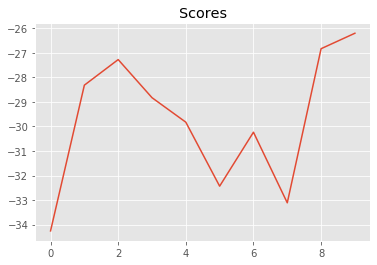

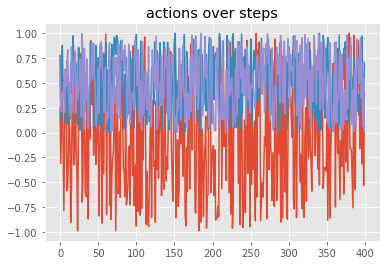

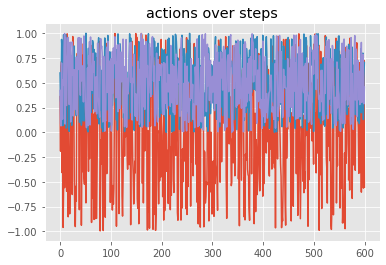

Episode =   10 (duration of 1000 steps); Reward = -26.199 (best = -26.199, in epi 10)   
	Episode training time:  10.954565048217773
Track generation: 1176..1474 -> 298-tiles track
	resetting episode... next explore_p:  1.0
Garbage collector: collected 8699 objects.
	step:  0 , action: [-0.634  0.537  0.174]
	step:  100 , action: [-0.083  0.025  0.995]
	step:  200 , action: [0.284 0.34  0.363]
	step:  300 , action: [-0.297  0.929  0.929]
	step:  400 , action: [0.25  0.051 0.629]
	step:  500 , action: [-0.513  0.059  0.161]
	step:  600 , action: [0.854 0.347 0.723]
	step:  700 , action: [0.987 0.974 0.948]
	step:  800 , action: [0.363 0.219 0.308]
	step:  900 , action: [0.895 0.717 0.216]
Episode =   11 (duration of 1000 steps); Reward = -36.027 (best = -26.199, in epi 10)   
	Episode training time:  50.252204179763794
Track generation: 1165..1460 -> 295-tiles track
	resetting episode... next explore_p:  0.9
Garbage collector: collected 173 objects.
	step:  0 , action: [0.851 0.305 0.37

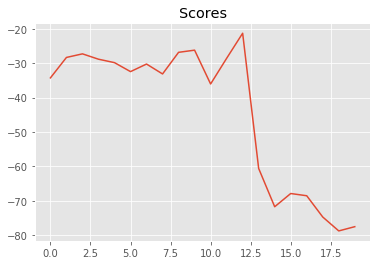

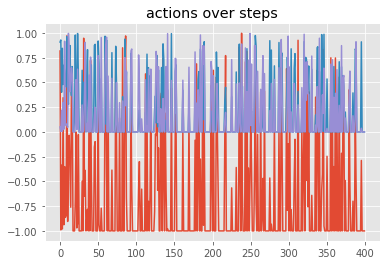

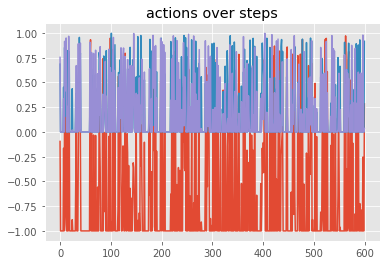

Episode =   20 (duration of 1000 steps); Reward = -77.492 (best = -21.283, in epi 13)   
	Episode training time:  50.562713384628296

******************************

*** All episodes training time (HH:MM:SS):  0:10:01.120742
	Average training time per episode:  30.05603711605072
******************************


In [43]:
import gym
import numpy as np

"""
# Create an environment and set random seed
"""
selectedEnvironment = 9
env = 0
envName = 0

# Toy Text - Discrete state and action space
if selectedEnvironment == 0:
    envName = 'Taxi-v2'

# Classic Control - Continuous State and Discrete Action Spaces
elif selectedEnvironment == 1: 
    envName = 'MountainCar-v0' # needs Discretized or better
elif selectedEnvironment == 2: 
    envName = 'Acrobot-v1'     # needs Discretized, Tile Encoding or better
elif selectedEnvironment == 3: 
    envName = 'CartPole-v1'    # needs Deep Q Learning to do well?

# Box 2D - Continuous State, Discrete Actions
elif selectedEnvironment == 4: 
    envName = 'LunarLander-v2' # discrete actions, continuous state

# Classic Control - Continuous State and Action Spaces
elif selectedEnvironment == 5: 
    envName = 'Pendulum-v0' # continuous only
elif selectedEnvironment == 6: 
    envName = 'MountainCarContinuous-v0' # continuous only

# Box 2D - Continuous State and Action Spaces
elif selectedEnvironment == 7:
    envName = 'LunarLanderContinuous-v2' # continuous only
elif selectedEnvironment == 8: 
    envName = 'BipedalWalker-v2'  # continuous only

# Box 2D - Image State and Continuous Action Spaces   
elif selectedEnvironment == 9: 
    envName = 'CarRacing-v0'      #  image input, actions [steer, gas, brake]

# Initialize the environment
env = gym.make(envName)
env.reset()

# Set output file paths based on environment
from visuals import examine_environment, examine_environment_MountainCar_discretized, examine_environment_Acrobat_tiled
#examine_environment(env)

from datetime import datetime
FORMAT = '%Y%m%d%H%M%S'
file_output_train = envName + '_train.txt'       # file name for saved results
file_output_test = envName + '_test.txt'       # file name for saved results
file_output_train = datetime.now().strftime(FORMAT) + file_output_train

print('-----------------------------------------------------------')
print('New Experiment, training output file name: ', file_output_train)

"""
# Create Agent
"""
agent = 0
selectedAgent = 3
if selectedAgent == 0:
    # create the agent discretized state space Q Learning
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    print("env.observation_space.shape[0]", state_size)
    print("env.action_space", action_size)
    from agents import QLearningAgentDiscretized as qlad
    agent = qlad.QLearningAgent(env)
#    examine_environment_MountainCar_discretized(env)

if selectedAgent == 1:
    # create the agent for tiled state space Q Learning
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    print("env.observation_space.shape[0]", state_size)
    print("env.action_space", action_size)
    from agents import QLearningAgentDiscretizedTiles as qlat
    agent = qlat.QLearningAgentDisTiles(env)
#    examine_environment_Acrobat_tiled(env, n_bins)

if selectedAgent == 2:
    # Create DDPG network agent
    obsSpace = env.observation_space.shape
    print("env.observation_space: ", obsSpace)
    from agents.DDPG import DDPG
    agent = DDPG(env, "continousStateAction")  # continousStateAction imageStateContinuousAction

if selectedAgent == 3:
    # Create DDPG network agent
    obsSpace = env.observation_space.shape
    print("env.observation_space: ", obsSpace)
    from agents.DDPG import DDPG
    agent = DDPG(env, "imageStateContinuousAction")  # continousStateAction imageStateContinuousAction
    
"""
# run the simulation
"""
import interact as sim
num_episodes=20
sim.interact(agent, env, num_episodes, mode='train', file_output=file_output_train, renderSkip=100)

"""
# Exit Environment
"""
env.close()
del agent 

## Conclusions

The first question of this project, how well an agent can generalize between different tasks, was inconclusive. At least it can be said that this particular agent did not appear to generalize very well. 

Through many experiments on Mountain Climber (ate up most of the project time), I was able to create an agent that performed quite well by leaderboard standards. However, when transferred to the Lunar Lander and Walker environments, while the agent was able to learn some degree of control (in flight boosters and walking joints respectively), it was unable to solve the environment even after a few small changes in parameters. This leads me to believe that the agent does not in fact generalize well.

The following lessons in agent design were learned:

*Effective*
* Larger batch size: provided that the learning rate was not too large, a larger batch size generally helped performance and number of episodes to find a solution.
* Tuning the learning rate: This seemed like 
* Soft updates: Without this, the agent performed very poorly.

*Unclear*
* Dropout. At least this didn't seem to hurt for values below 0.3. It also appeared to provide some stability and regularization against overfitting.
* Explore. Small amount of exploration, correlated (seemed slightly better) or uncorrelated, with 5-10% decay per episode. Exploration is deemed important in more papers, however finding the right balance was very tricky. Too much exploration and the agent takes much longer to find a soution. Too little exploration and the agent may not find a solution at all. For Mountain Climber, this did not seem to be imporatnt besides the initial random exploration to fill a buffer of enough steps (I settled on 10,000 steps as the min frames to start learning, though other papers use much more, often up to 80,000 [17]). One thing that way clear was that pure exploitation was essential for the network to properly learn, and adding noise to network predictions made learning much harder. The lesson here was either explore or exploit, but trying to do both seems to confuse the network. Better to be decisive.
* larger amount of neurons per layer. This didn't seem to hurt the ability to learn, though with more parameters learning look longer per episode, and took longer to converge to a solution. Assuming the agent had enough capacity to learn the task, it seems that a smaller network learns faster and is generally fairly stable. 
* Action repeat. Did not seem to provide any benefit, but didn't seem to hurt either. Instead of this it would probably be better to directly put the prior states and actions into the network in a RNN style architecture.
* Batch normalization. This definitely smoothed out agent actions. It also slows down learning (both in training time per episode, and in number of episodes to find a solution), and appears to makes the final result less stable (more variation between episodes, even if it is able to solve the environemnt). Batch normalization appears to make fine control more difficult, in a similar way to adding too much noise and never allowing pure exploitation makes learning hard.
* Gamma, discount factor. This hyperparameter was not investigated. Further analysis required.

*Ineffective*
* L2 regularization. This appears to make the agents actions too in-precise to properly learn
* ELU activation function instead of RELU. Did not appear to provide any benefit and made performance worse.
* Learning Frequency. Didn't appear to add any value.
* Large amount of exploration (1% decay). Generally this made the agent perform much worse, it seems like it makes the agent take a long time to find a solution.
* Network input noise as exploration. This destabilized learning.

Stabilizing the training was difficult, with big variations in training performance from small changes in agent networks architecture or hyperparameters. This often lead to divergence in the training and the agent unable to solve the environment. When this happens the agent gets stuck in a local minimum, repeating some undesirable action for all-time, or simply forgetting how to complete a task it could do before (often called "catastrophic forgetting" for obvious reasons).

Compute speed is important. For my i7-2600, a single experiment used about 20% of all cores, so around 2 experiments could run without too much slowdown, especially since the GPU 1080ti and has more than enough memory to handle the data sizes of the reinforcement learning environments and their batch sizes, except for the case of the image environemt space of Car Racing. This is something that would have been very helpful to figure out early on, instead of later.

Creating a reinforcement learning framework is also a significant effort, particularly one that can interchange different agents and environments. Considering how long experiments on the relatively simple Mountain Climber network took, and how much coding work was involved in the training pipeline and converting the agent to work in image state coordinates (ouch for the memory leak). 

Given these factors, this project scope was probably a bit too ambituous given the small timeline for completion, and my own limited experience in reinforcement learning.

That said, I definitely learned a lot.

## References

* [1] CONTINUOUS  CONTROL  WITH  DEEP  REINFORCEMENTLEARNING - DDPG - https://arxiv.org/pdf/1509.02971.pdf

* [2] Batch Normalization: Accelerating Deep Network Training byReducing Internal Covariate Shift - https://arxiv.org/pdf/1502.03167.pdf
* [3] Implementing Batch Normalation with Keras - https://www.dlology.com/blog/one-simple-trick-to-train-keras-model-faster-with-batch-normalization/

* [4] Taming the Noise inReinforcement Learning via Soft Updates - http://www.auai.org/uai2016/proceedings/papers/219.pdf

* [5] FAST AND ACCURATE DEEP NETWORK LEARNING BY EXPONENTIAL LINEAR UNITS(ELUS) - https://arxiv.org/pdf/1511.07289.pdf
* [6] ELU as a Neural Networks Activation Function - https://sefiks.com/2018/01/02/elu-as-a-neural-networks-activation-function/

* [7] Dropout:  A Simple Way to Prevent Neural Networks fromOverfitting - http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf

* [8] ON THE CONVERGENCE OF ADAM AND BEYOND - https://openreview.net/pdf?id=ryQu7f-RZ
* [9] Adam: A Method for Stochastic Optimization - https://arxiv.org/abs/1412.6980v8

* [10] Finding Good Learning Rate and The One Cycle Policy - https://towardsdatascience.com/finding-good-learning-rate-and-the-one-cycle-policy-7159fe1db5d6

* [11] The False Promise of Off-Policy Reinforcement Learning Algorithms - https://towardsdatascience.com/the-false-promise-of-off-policy-reinforcement-learning-algorithms-c56db1b4c79a

* [12] An Overview of Regularization Techniques in Deep Learning - https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/

* [13] cifar10_cnn practice project from Udacity - Fork: https://github.com/smmuzza/machine-learning/blob/master/projects/practice_projects/cnn/cifar10-classification/cifar10_cnn.ipynb
* [14] DDQN with Dropout: CarRacing-v0 - https://github.com/AMD-RIPS/RL-2018/blob/master/documents/leaderboard/IPAM-AMD-Car_Racing.ipynb

* [15] "The Learning Brain" Great Courses by Prof. Thad A. Polk

* [16] Playing Atari with Deep Reinforcement Learning - https://arxiv.org/pdf/1312.5602v1.pdf
* [17] Rainbow: Combining Improvements in Deep Reinforcement Learning - https://arxiv.org/pdf/1710.02298.pdf
* [18] Deep Reinforcement Learning with Double Q-learning - https://arxiv.org/pdf/1509.06461.pdf
* [19] Addressing Function Approximation Error in Actor-Critic Methods - https://arxiv.org/abs/1802.09477
* [20] Deep Q Networks for Atari Games - https://github.com/danielegrattarola/deep-q-atari